#     MSDS 7331: Project 3 

# Recommendation System

### Team Member Names:

Name 1: Araya Messa  
Name 2: Manjula Kottegoda  
Name 3: Rajeev Kumar  


### Date : 04/30/2017

# 1.  Object and Background-Business Understanding

As e-commerce websites entice consumers into an age of discovery leaving behind the era of search, online shoppers are beginning to see products and services they did not know existed but were 'handpicked' to fit their individual tastes. Often these handpicked selections are presented to consumers as non-obtrusive recommendations with the goal of enhancing the shopping experience all while increasing the retailer’s cross-selling potential. Highly successful retailers like Amazon make such recommendations dressed more like a value-added service and presented using language like “Customers who bought this item also bought…” coupled with an easily scrollable list of cross-sell merchandise to browse. As the CEO of Amazon revealed in 2015, 35% of sales at Amazon were a direct result of successful cross-selling [1] highlighting the enormous commercial potential of accurate recommendations.


Recommendations made by on-line retailers are not made at random, but are based on other similar consumers’ preferences or purchases. Increasingly this phenomenon is becoming a powerful must-have marketing tool that retailers deploy to meet consumer expectations and generate sales through up-selling or cross-selling. Getting an understanding on a consumer’s preferences and inclinations is a complex art and a science. And the engine behind customized 'handpicking' is powered by algorithm based Recommendation Systems using an array of techniques such as Collaborative Filtering and Markov Chains. 

 
The goal of this project is to build a Recommendation System for book buyers through Collaborative Filtering. We chose the book buyers data from the Book-Crossing Dataset [2] collected in 4 weeks spanning August to September of 2004 to build our recommendation system. The dataset consists of data from 278,858 individual users providing both implicit and explicit ratings on 271,379 books [3]. Once the model is built we will validate its quality and performance and explore methods of enhancing the model to fit a commercial deployment scenario.


# 2. Data Descriptions (Data Understanding)

 The Book-Crossing dataset [3] used in the study comprised of three delimited files and the delimiter was ";".

  
**BX-Users**:  
This file contained sanitized user data primarily consisting of unique user identifications, user’s location and the Age. 

**BX-Books**:
Books data consisted of the details on each particular book. Starting with the International Standard Book Number (ISBN) code, Author of the Book, Year of publication, Publisher name, and Book cover image URLs. In case of several authors only the first is listed. We had three URLs for each book cover (small image,medium image,large image).

**BX-Book-Ratings**:
This data file contains the book rating information. The user ID that did the rating along with the ISBN identifier of the book and the rating (1-10) given are the three data elements. Rating of 10 will indicate the highest rating, a rating of 1 is the lowest rating and a rating of 0 is an implicit rating.

# 3. Data Preparation

Data preparation for this study followed the high-level steps below

* Import three Data files in to three dataframes
* Removing implicit elements from the dataset
* Removing missing values from the dataset
* Remove bad records from the dataset
* Merge Book details and Book ratings datasets by ISBN
* Clean up the merged Book_details_Book_ratings dataset 
* Visualize Data using Graph Lab

### Importing Data using Pandas Dataframe

In [86]:
#Importing data into Pandas DataFrame from the datasets and dropping “NA”
import pandas as pd
df_Users = pd.read_csv("BX-CSV-Dump/BX-Users.csv", sep=";",error_bad_lines=False).dropna()
df_Books = pd.read_csv("BX-CSV-Dump/BX-Books.csv",sep=";", error_bad_lines=False).dropna()
df_Book_Ratings=pd.read_csv("BX-CSV-Dump/BX-Book-Ratings.csv",sep=";",error_bad_lines=False ).dropna()


Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 8 fields, saw 9
Skipping line 251296: expected 8 fields, saw 9
Skipping line 259941: expected 8 fields, saw 9
Skipping line 261529: expected 8 fields, saw 9



In [87]:
## printing first 5 rows for df_Users
df_Users.head()

User-ID                        Location   Age
1         2       stockton, california, usa  18.0
3         4       porto, v.n.gaia, portugal  17.0
5         6   santa monica, california, usa  61.0
9        10      albacete, wisconsin, spain  26.0
10       11  melbourne, victoria, australia  14.0

In [88]:
#Print Data Types of the Users Dataframe
df_Users.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [89]:
## printing first 5 rows for df_Books
df_Books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [90]:
## printing first 5 rows for df_Ratings
df_Book_Ratings.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

### Removing Implicit Ratings (all zero values)

There are situations where ratings are not <b>explicitly</b> provided for products. In our case, not all users rate all the books they encounter. Never-the-less interactions between users and books are captured as they either look at a book or show interest in a book by clicking through it. Such interactions are compiled as <b>implicit</b> ratings. The Book Crossing Dataset contains both implicit and explicit ratings. Implicit ratings are indicated by a rating value of 0 in the Book ratings dataset. 


Here we are removing the implicit data from the dataset to reduce the noise and get a better idea on the preferences of users as we create an item-to-user model based on explicit ratings.


In [91]:
#Dropping Implicit Ratings and their associated elemnts from the dataset 
df_Book_Ratings=df_Book_Ratings[~(df_Book_Ratings['Book-Rating'] ==0 )]


In [92]:
## Quick view of the dataset after removing all zeroes 
df_Book_Ratings.head()

User-ID        ISBN  Book-Rating
1   276726  0155061224            5
3   276729  052165615X            3
4   276729  0521795028            6
6   276736  3257224281            8
7   276737  0600570967            6

### Merging Books and Book Ratings using ISBN as a key

Let us merge the books and book-Ratings data, that contain the list of **identifiers**, **titles of the books** and the **ratings** gave by the **users** respectively. 

In [93]:
 # Merge Book rating dataset with book dataset on ISBN
dfBooks_BookRatings = df_Book_Ratings.merge(df_Books, on="ISBN", how="outer").dropna()
dfBooks_BookRatings.head()

User-ID        ISBN  Book-Rating  \
0  276726.0  0155061224          5.0   
1  276729.0  052165615X          3.0   
2  276729.0  0521795028          6.0   
8  276744.0  038550120X          7.0   
9   11676.0  038550120X         10.0   

                                          Book-Title    Book-Author  \
0                                   Rites of Passage     Judith Rae   
1                                     Help!: Level 1  Philip Prowse   
2  The Amsterdam Connection : Level 4 (Cambridge ...    Sue Leather   
8                                    A Painted House   JOHN GRISHAM   
9                                    A Painted House   JOHN GRISHAM   

  Year-Of-Publication                   Publisher  \
0                2001                      Heinle   
1                1999  Cambridge University Press   
2                2001  Cambridge University Press   
8                2001                   Doubleday   
9                2001                   Doubleday   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0155061224.0...   
1  http://images.amazon.com/images/P/052165615X.0...   
2  http://images.amazon.com/images/P/0521795028.0...   
8  http://images.amazon.com/images/P/038550120X.0...   
9  http://images.amazon.com/images/P/038550120X.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0155061224.0...   
1  http://images.amazon.com/images/P/052165615X.0...   
2  http://images.amazon.com/images/P/0521795028.0...   
8  http://images.amazon.com/images/P/038550120X.0...   
9  http://images.amazon.com/images/P/038550120X.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0155061224.0...  
1  http://images.amazon.com/images/P/052165615X.0...  
2  http://images.amazon.com/images/P/0521795028.0...  
8  http://images.amazon.com/images/P/038550120X.0...  
9  http://images.amazon.com/images/P/038550120X.0...

In [94]:
# Print Data Types of the Combined book-user-rating Dataframe
dfBooks_BookRatings.dtypes

User-ID                float64
ISBN                    object
Book-Rating            float64
Book-Title              object
Book-Author             object
Year-Of-Publication     object
Publisher               object
Image-URL-S             object
Image-URL-M             object
Image-URL-L             object
dtype: object

#### converting datatypes into integer

In [95]:
import numpy as np
## converting age and year of publication to int for df_Users and df_Books
df_Users['Age'] = df_Users['Age'].apply(np.int64, errors=False)
df_Books["Year-Of-Publication"]=df_Books["Year-Of-Publication"].apply(np.int64, errors=False)

## converting Book-Rating, User-ID, and Year-Of-Publication  to int for df_Books_Ratings
dfBooks_BookRatings["Book-Rating"] = dfBooks_BookRatings["Book-Rating"].apply(np. int64, errors=False)
dfBooks_BookRatings["User-ID"] = dfBooks_BookRatings["User-ID"].apply(np. int64, errors=False)
dfBooks_BookRatings["Year-Of-Publication"] = dfBooks_BookRatings["Year-Of-Publication"].apply(np. int64, errors=False)

In [96]:
# Print Data Types of the Combined book-user-rating Dataframe after conversion
dfBooks_BookRatings.dtypes

User-ID                 int64
ISBN                   object
Book-Rating             int64
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

### Converting Dataframe to SFrame

In [97]:
import graphlab as gl

#users info
sf_Users = gl.SFrame(data=df_Users)

#book info
sf_Books = gl.SFrame(data=df_Books)

#combined(book and book rating info)
sfBooks_BookRatings=gl.SFrame(data=dfBooks_BookRatings) 

#### Preparing SFrame for data visualization

In [98]:
## Slicing User-ID and Book-Rating to merge with users info sothat we use 
## it to visualize data
sfUserRatings=sfBooks_BookRatings[['User-ID','Book-Rating']]

## converting 'sfUserRatings' to dataframe
dfUserRatings=sfUserRatings.to_dataframe()

## Merging 'df_Users' and 'dfUserRatings' i.e User-Id,Location, Age to 
## User-Id, and Book-Ratings
dfUsers_UserRatings=df_Users.merge(dfUserRatings, on="User-ID", how="outer").dropna()

## Converting User-ID, Age, and Book-Rating to int
dfUsers_UserRatings["User-ID"] = dfUsers_UserRatings["User-ID"].apply(np. int64, errors=False)
dfUsers_UserRatings["Age"] = dfUsers_UserRatings["Age"].apply(np. int64, errors=False)
dfUsers_UserRatings["Book-Rating"] = dfUsers_UserRatings["Book-Rating"].apply(np. int64, errors=False)

## Converting dfUsers_UserRatings to SFrame 
sfUsers_UserRatings=gl.SFrame(data=dfUsers_UserRatings)

In [99]:
# Print top 10 records from the SFrame dataset.
sfUsers_UserRatings.head()

Columns:
	User-ID	int
	Location	str
	Age	int
	Book-Rating	int

Rows: 10

Data:
+---------+--------------------------------+-----+-------------+
| User-ID |            Location            | Age | Book-Rating |
+---------+--------------------------------+-----+-------------+
|    19   |           weston, ,            |  14 |      7      |
|    42   |    appleton, wisconsin, usa    |  17 |      7      |
|    44   | black mountain, north caro...  |  51 |      8      |
|    51   |    renton, washington, usa     |  34 |      9      |
|    56   |     cheyenne, wyoming, usa     |  24 |      7      |
|    56   |     cheyenne, wyoming, usa     |  24 |      9      |
|    64   |      lyon, rhone, france       |  32 |      7      |
|    67   | framingham, massachusetts, usa |  43 |      7      |
|    70   |    rochester, new york, usa    |  44 |      10     |
|    75   |  long beach, california, usa   |  37 |      5      |
+---------+--------------------------------+-----+-------------+
[10 rows x 4 columns]

In [100]:
# Print Data Types of the user-rating SFrame
sfUsers_UserRatings.dtype()

[int, str, int, int]

# 4. Data Exploration

### Summary and Visualization 

Let us see some insights about the data using Graphlab. We can visualize data using *SFrame.show()* by a built-in API called Canvas. The output can be shown as a separate browser or just inline with the Note. The Graphlab data visualization information is found at https://turi.com/products/create/docs/generated/graphlab.SFrame.show.html   

In [101]:
# Print Column Names of the user-rating SFrame
sfUsers_UserRatings.column_names()

['User-ID', 'Location', 'Age', 'Book-Rating']

#### Breaking Age into intervals

In [102]:
# Function to define Age group
def combine_age(Age):
    
    if Age<15:
        return '15-'
    elif Age>=15 and Age<20:
        return'15-20'
    elif Age>=20 and Age<25:
        return'20-25'
    elif Age>=25 and Age<30:
        return'25-30'
    elif Age>=30 and Age<35:
        return'30-35'
    elif Age>=35 and Age<40:
        return'35-40'
    elif Age>=40 and Age<50:
        return'40-50'
    elif Age>=50 and Age<60:
        return'50-60'
    elif Age>=60 and Age<70:
        return '60-70'
    elif Age>=70:
        return '70+'

In [103]:
# Combine Age group to the user-rating SFrame.
sfUsers_UserRatings['Age']=sfUsers_UserRatings['Age'].apply(combine_age)
sfUsers_UserRatings.head()

Columns:
	User-ID	int
	Location	str
	Age	str
	Book-Rating	int

Rows: 10

Data:
+---------+--------------------------------+-------+-------------+
| User-ID |            Location            |  Age  | Book-Rating |
+---------+--------------------------------+-------+-------------+
|    19   |           weston, ,            |  15-  |      7      |
|    42   |    appleton, wisconsin, usa    | 15-20 |      7      |
|    44   | black mountain, north caro...  | 50-60 |      8      |
|    51   |    renton, washington, usa     | 30-35 |      9      |
|    56   |     cheyenne, wyoming, usa     | 20-25 |      7      |
|    56   |     cheyenne, wyoming, usa     | 20-25 |      9      |
|    64   |      lyon, rhone, france       | 30-35 |      7      |
|    67   | framingham, massachusetts, usa | 40-50 |      7      |
|    70   |    rochester, new york, usa    | 40-50 |      10     |
|    75   |  long beach, california, usa   | 35-40 |      5      |
+---------+--------------------------------+-------+-------------+
[10 rows x 4 columns]

### Age vs. Age count

In [104]:
# Plot of Age vs User Count
gl.canvas.set_target("ipynb")
sfUsers_UserRatings.show(view="Bar Chart",x="Age", y=None)

##### From the above plot, it can be observed that most participants are aged between 20 and 60. It is also evident f that users aged 50 and above  have less of a presence on the Amazon website. It could possibly be because online shopping is not popular among the 50+ demography.

### Book Rating vs. Book Rating count

In [105]:
# Histogram of Ratings
gl.canvas.set_target("ipynb")
sfUsers_UserRatings.show(view="Bar Chart",x="Book-Rating", y=None)

##### From the above plot,  after removing all the implicit (zero ratings), it is clear that majority of books are rated high and only small fraction of books are rated low by customers.

### Age vs. Book Rating

In [106]:
# Distribution of Rating by Age Groups
gl.canvas.set_target("ipynb")
sfUsers_UserRatings[["Age", "Book-Rating"]].show(view="BoxWhisker Plot",x="Age", y="Book-Rating")

The figure above show that most of the low ratings came from Book-crossing teen age users(aged between 15 and 20) and old users (older than 70). Where as, age 30s-50s are good raters. This is in line with the common understanding [11] that users who rate books are disproportionately ones that are happy with the product.  


#### Preparing target columns

In [108]:
## Slicing User-ID, Book-Title, and Book-Rating to use for recommendations
sf_TargetCols=sfBooks_BookRatings[["User-ID","Book-Title","Book-Rating"]]
## printing top 1000 records for target columns
sf_TargetCols.print_rows(10)

+---------+-------------------------------+-------------+
| User-ID |           Book-Title          | Book-Rating |
+---------+-------------------------------+-------------+
|  276726 |        Rites of Passage       |      5      |
|  276729 |         Help!: Level 1        |      3      |
|  276729 | The Amsterdam Connection :... |      6      |
|  276744 |        A Painted House        |      7      |
|  11676  |        A Painted House        |      10     |
|  16877  |        A Painted House        |      9      |
|  17975  |        A Painted House        |      6      |
|  20806  |        A Painted House        |      6      |
|  21340  |        A Painted House        |      9      |
|  21356  |        A Painted House        |      7      |
+---------+-------------------------------+-------------+
[383839 rows x 3 columns]



In [23]:
# Print Data Types of the Target SFrame
sf_TargetCols.dtype()

[int, str, int]

# 5. Modeling-Book Recommendation 

We now begin the modeling phase. Here we will be looking at building relationships between Books and users and well amongst books themselves. We will also look at parameters that could be calibrated to optimize models. The ultimate goal of the model is to recommend products to a given user that they would show interest in there by enhancing their shopping experience. 


We have two goals here. One is to recommend similar items (item_item), other is to predict rating of the book that user has not read/rated(user_item) based on his/her past preference.

# 5.1. User-Item Recommendation System

The GraphLab Create recommender toolkit provides a unified interface to train a variety of recommender models and use them to make recommendations.  

Let's use graphlab.recommender.create to recommend top 15 items for each users.

In [24]:
# User-Item Similarity model to recommend top 15 items to each user
model = gl.recommender.create(sf_TargetCols, user_id="User-ID", item_id="Book-Title", target="Book-Rating")
results = model.recommend(users=None, k=15)
model.save("Recommender_model_1")

results.print_rows(15) # the recommendation output

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 383839 observations with 68091 users and 135565 items.

Data prepared in: 0.625921s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 47979 / 383839 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | 3.70379                                  |

| 5       | 0.0488281         | 4.36068                                  |

| 6       | 0.0244141         | 4.93779                                  |

| 7       | 0.012207          | 5.42828                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0976562         | 3.70379                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 98us         | 6.64738           | 1.84135               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 378.429ms    | 6.06894           | 1.81361               | 0.0976562   |

| 2       | 715.651ms    | 5.22505           | 1.65763               | 0.0580668   |

| 3       | 1.05s        | 4.52697           | 1.49636               | 0.042841    |

| 4       | 1.38s        | 3.75879           | 1.28556               | 0.0345267   |

| 5       | 1.72s        | 3.14824           | 1.10846               | 0.029206    |

| 6       | 2.06s        | 2.70885           | 0.977272              | 0.0254734   |

| 10      | 3.37s        | 1.78099           | 0.678834              | 0.017366    |

| 11      | 3.71s        | 1.65711           | 0.636992              | 0.016168    |

| 15      | 5.00s        | 1.33545           | 0.524126              | 0.0128124   |

| 20      | 6.62s        | 1.11402           | 0.447101              | 0.0103259   |

| 25      | 8.20s        | 0.977837          | 0.399035              | 0.00873464  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.948767

Final training RMSE: 0.366405

recommendations finished on 1000/68091 queries. users per second: 479.032

recommendations finished on 2000/68091 queries. users per second: 477.231

recommendations finished on 3000/68091 queries. users per second: 477.046

recommendations finished on 4000/68091 queries. users per second: 477.236

recommendations finished on 5000/68091 queries. users per second: 477.615

recommendations finished on 6000/68091 queries. users per second: 477.863

recommendations finished on 7000/68091 queries. users per second: 477.44

recommendations finished on 8000/68091 queries. users per second: 477.458

recommendations finished on 9000/68091 queries. users per second: 477.292

recommendations finished on 10000/68091 queries. users per second: 477.435

recommendations finished on 11000/68091 queries. users per second: 476.734

recommendations finished on 12000/68091 queries. users per second: 476.721

recommendations finished on 13000/68091 queries. users per second: 476.305

recommendations finished on 14000/68091 queries. users per second: 476.055

recommendations finished on 15000/68091 queries. users per second: 475.976

recommendations finished on 16000/68091 queries. users per second: 475.746

recommendations finished on 17000/68091 queries. users per second: 475.678

recommendations finished on 18000/68091 queries. users per second: 475.986

recommendations finished on 19000/68091 queries. users per second: 476.313

recommendations finished on 20000/68091 queries. users per second: 476.363

recommendations finished on 21000/68091 queries. users per second: 476.479

recommendations finished on 22000/68091 queries. users per second: 476.532

recommendations finished on 23000/68091 queries. users per second: 476.749

recommendations finished on 24000/68091 queries. users per second: 463.379

recommendations finished on 25000/68091 queries. users per second: 446.58

recommendations finished on 26000/68091 queries. users per second: 437.306

recommendations finished on 27000/68091 queries. users per second: 432.457

recommendations finished on 28000/68091 queries. users per second: 433.647

recommendations finished on 29000/68091 queries. users per second: 435.091

recommendations finished on 30000/68091 queries. users per second: 436.566

recommendations finished on 31000/68091 queries. users per second: 437.935

recommendations finished on 32000/68091 queries. users per second: 439.301

recommendations finished on 33000/68091 queries. users per second: 440.445

recommendations finished on 34000/68091 queries. users per second: 441.657

recommendations finished on 35000/68091 queries. users per second: 442.736

recommendations finished on 36000/68091 queries. users per second: 443.657

recommendations finished on 37000/68091 queries. users per second: 444.609

recommendations finished on 38000/68091 queries. users per second: 445.532

recommendations finished on 39000/68091 queries. users per second: 446.262

recommendations finished on 40000/68091 queries. users per second: 447.129

recommendations finished on 41000/68091 queries. users per second: 447.731

recommendations finished on 42000/68091 queries. users per second: 448.538

recommendations finished on 43000/68091 queries. users per second: 448.576

recommendations finished on 44000/68091 queries. users per second: 446.169

recommendations finished on 45000/68091 queries. users per second: 446.654

recommendations finished on 46000/68091 queries. users per second: 444.665

recommendations finished on 47000/68091 queries. users per second: 445.264

recommendations finished on 48000/68091 queries. users per second: 445.903

recommendations finished on 49000/68091 queries. users per second: 446.581

recommendations finished on 50000/68091 queries. users per second: 447.271

recommendations finished on 51000/68091 queries. users per second: 447.64

recommendations finished on 52000/68091 queries. users per second: 447.856

recommendations finished on 53000/68091 queries. users per second: 448.274

recommendations finished on 54000/68091 queries. users per second: 448.627

recommendations finished on 55000/68091 queries. users per second: 449.217

recommendations finished on 56000/68091 queries. users per second: 449.731

recommendations finished on 57000/68091 queries. users per second: 450.176

recommendations finished on 58000/68091 queries. users per second: 450.727

recommendations finished on 59000/68091 queries. users per second: 451.151

recommendations finished on 60000/68091 queries. users per second: 449.637

recommendations finished on 61000/68091 queries. users per second: 444.306

recommendations finished on 62000/68091 queries. users per second: 442.462

recommendations finished on 63000/68091 queries. users per second: 443.039

recommendations finished on 64000/68091 queries. users per second: 443.569

recommendations finished on 65000/68091 queries. users per second: 444.033

recommendations finished on 66000/68091 queries. users per second: 444.451

recommendations finished on 67000/68091 queries. users per second: 444.912

recommendations finished on 68000/68091 queries. users per second: 443.225

+---------+-------------------------------+---------------+------+
| User-ID |           Book-Title          |     score     | rank |
+---------+-------------------------------+---------------+------+
|  276726 | Harry Potter and the Order... | 9.64904225846 |  1   |
|  276726 | Harry Potter and the Priso... | 9.50672615548 |  2   |
|  276726 | Harry Potter and the Goble... | 9.46316803475 |  3   |
|  276726 | Harry Potter and the Sorce... | 9.45131815453 |  4   |
|  276726 | Harry Potter and the Chamb... | 9.32010234376 |  5   |
|  276726 | Harry Potter and the Sorce... | 9.31403625985 |  6   |
|  276726 |     To Kill a Mockingbird     |  9.2703110077 |  7   |
|  276726 |       The Da Vinci Code       | 9.05528987427 |  8   |
|  276726 | The Two Towers (The Lord o... | 8.94106973191 |  9   |
|  276726 |    The Secret Life of Bees    | 8.83551610489 |  10  |
|  276726 | The Subtle Knife (His Dark... | 8.83303702851 |  11  |
|  276726 |   The Lovely Bones: A Novel   | 8.81337035676 |  1

As shown above, our model recommended top 15 highest rated items for a user with user id "276726". We would evaluate these results in the validation phase. 

# 5.2. Item-Item Recommendation System
Now let's look at creating the item-item similarity matrix. That is, for each item, what are the top closest items based upon user ratings.

### Measure of Similarity 

There are three choices of similarity metrics to use: ‘jaccard’, ‘cosine’ and ‘pearson’.

Jaccard similarity is used to measure the similarity between two set of elements. Jaccard is a good choice when one only has implicit feedbacks of items (e.g., people rated them or not), or when one does not care about how many stars items received.

If one needs to compare the ratings of items, Cosine and Pearson similarity are recommended. Cosine similarity is recommended to use when there is a sparse data. A problem with Cosine similarity is that it does not consider the differences in the mean and variance of the ratings made to items i and j. On the other hand Pearson Correlation similarity is used where the effects of means and variance have been removed.

Predictions of items depend on whether target is specified(when item is rated) or not(when item is not rated). In our case as we have a book dataset with high sparsity *so We are going to use **cosine similarity** for our item-item similarity recommender.[4]  


### Sparsity of the Dataset

In [25]:
density= float(dfBooks_BookRatings.shape[0])/float(len(pd.unique(dfBooks_BookRatings['User-ID'])) * len(pd.unique(dfBooks_BookRatings['Book-Title'])) * len(pd.unique(dfBooks_BookRatings['Book-Rating'])))
sparsity = 1 - density

In [26]:
print sparsity

0.999995841738


##### Sparsity of the dataset is 0.99999584, which is very high. Therefore, cosine distance should be used for item similarity. 

In [27]:
# Item-Item Similarity model to recommend top 15 items
from graphlab import item_similarity_recommender
item_item = gl.recommender.item_similarity_recommender.create(sf_TargetCols, 
                                  user_id="User-ID", 
                                  item_id="Book-Title", 
                                  target="Book-Rating",
                                  only_top_k=15,
                                  similarity_type="cosine")

results = item_item.get_similar_items(k=15)
results.print_rows(15)

Recsys training: model = item_similarity

Preparing data set.

Data has 383839 observations with 68091 users and 135565 items.

Data prepared in: 0.819454s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 6.975ms                        | 1.25       |

| 49.007ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 1.05s                               | 0                | 0               |

| 2.06s                               | 63.5             | 86156           |

| 3.09s                               | 66.25            | 90001           |

| 4.49s                               | 69               | 93557           |

| 5.07s                               | 71               | 96353           |

| 6.20s                               | 71.75            | 97478           |

| 7.08s                               | 72.25            | 98068           |

| 8.08s                               | 75               | 101784          |

| 9.09s                               | 87.25            | 118590          |

| 10.19s                              | 94               | 127477          |

| 12.66s                              | 99.25            | 134566          |

| 15.37s                              | 100              | 135565          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 15.4696s

+------------------+-------------------------------+-----------------+------+
|    Book-Title    |            similar            |      score      | rank |
+------------------+-------------------------------+-----------------+------+
| Rites of Passage | Hamlet (Arden Edition of t... |  0.691094756126 |  1   |
| Rites of Passage |   The Christy Moore Songbook  |  0.345547378063 |  2   |
| Rites of Passage | Cuantas Veces En Un Siglo ... |  0.345547378063 |  3   |
| Rites of Passage | Frida Kahlo: Mujer, ideolo... |  0.345547378063 |  4   |
| Rites of Passage |            Skerrett           |  0.345547378063 |  5   |
| Rites of Passage | O sexo dos anjos (Argumentos) |  0.345547378063 |  6   |
| Rites of Passage |     50 Poemas Del Milenio     |  0.244338870049 |  7   |
| Rites of Passage |           Sandcastle          |  0.244338870049 |  8   |
| Rites of Passage |       An Accidental Man       |  0.227544546127 |  9   |
| Rites of Passage |          Oscar Wilde          |  0.19213187

Item-item model recommended the top 15 similar items to each item. 

The item-item matrix is typically a good baseline. However, we can do better with a more personalized model that takes into account the various preferences of specific users, rather than all users rating specific items.

# 5.3. Cross Validation

Once the models are built we need to validate its performance, quality as well as its versatility, as in how well it generalizes to other data. Hence, we need targeted evaluations performed on certain criteria of the model. The chosen criteria to perform the evaluation are RMSE, Precision and Recall.
 
We start off with the standard approach of splitting the data into two parts, a training dataset and a testing dataset using an 80:20 split. The model is built using the larger training dataset whilst the model evaluation is performed using the testing dataset ensuring that model validation is not performed on the same data that the model was trained on. In other words, model validation is done using data that it has not come across. For all practical purposes this could be considered a simulated ‘live’ test.
 
The most widely used evaluation measurement is the RMSE or Root Mean Squared Error. It is a straightforward difference measurement on predicted vs expected rating value. In other words RMSE measures how good the model’s prediction is. The lower the RMSE the closer the prediction is to the actual rating.
 
Another evaluation measurement is <b>*Precision*</b> which in short is a measure of exactness given as a fraction of the books the model showed from what the user actually liked. Or a proportion of recommended books that are actually good.
 
<b>*Recall*</b> on the other hand is a measure of completeness that shows the fraction of relevant items retrieved by the model out of all relevant items. In our context, Recall is the fraction of the liked books that the model found.
 
Of the three evaluation metrics, we chose RMSE as the key criteria to make a judgement on the quality of the model. This is primarily based on the context of the problem where the accuracy was important so as to generate models that would blend better with other models keeping in mind that that our goal is to formulate a blended model approach for final deployment.

### Splitting data into Train and Test data for model training and validation

We used a recommender-friendly train-test split provided on the Graghlab Create API. This can be found at [this](https://turi.com/products/create/docs/generated/graphlab.recommender.util.random_split_by_user.html).

To accurately evaluate the precision-recall of a model trained on explicit rating data, it's important to only include highly rated items in our test set as these are the items a user would likely choose. So we split our dataset into two, one with high rated books and other with low rated books.
The test dataset is generated by first choosing max_num_users out of the total number of users in the highly rated dataset. Then, for each of the chosen test users, a portion of the user’s items (determined by item_test_proportion) is randomly chosen to be included in the test set. This split allows the training data to retain enough information about the users in the testset, so that adequate recommendations can be made. The total number of users in the test set may be fewer than max_num_users if a user was chosen for the test set but none of their items are selected. We also use an 80/20 ratio splitting in our dataset that many articles have been using it.  
The GraphLab Create recommender toolkit provides several ways of working with rating data while ensuring good precision-recall. To accurately evaluate the precision-recall of a model trained on explicit rating data, it's important to only include highly rated items in your test set as these are the items a user would likely choose. 

In [28]:
## Number of records on target SFrame
len(sf_TargetCols)

383839

In [109]:
## Train/Test split
high_rated_data = sf_TargetCols[sf_TargetCols["Book-Rating"] >= 6]
low_rated_data = sf_TargetCols[sf_TargetCols["Book-Rating"] < 6]
train_1, test = gl.recommender.util.random_split_by_user(
                                    high_rated_data, user_id='User-ID', item_id='Book-Title',item_test_proportion=0.2)
train = train_1.append(low_rated_data)

# 5.3.1. Evaluating Item-Item Similarity Recommender

In [110]:
## item-item model evaluation
from IPython.display import display
from IPython.display import Image

gl.canvas.set_target('ipynb')

item_item = gl.recommender.item_similarity_recommender.create(train, 
                                  user_id="User-ID", 
                                  item_id="Book-Title", 
                                  target="Book-Rating",
                                  only_top_k=25,
                                  similarity_type="cosine")
rmse_results = item_item.evaluate(test)


Recsys training: model = item_similarity

Preparing data set.

Data has 383031 observations with 67978 users and 135383 items.

Data prepared in: 0.650002s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 21.467ms                       | 2.75       |

| 67.775ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 1.07s                               | 0                | 7               |

| 2.07s                               | 36.25            | 49283           |

| 3.07s                               | 69.5             | 94169           |

| 4.08s                               | 70.75            | 96112           |

| 5.13s                               | 75               | 101750          |

| 6.12s                               | 76.5             | 103577          |

| 7.09s                               | 89.75            | 121636          |

| 8.11s                               | 95.25            | 129134          |

| 9.10s                               | 97               | 131344          |

| 10.10s                              | 98.75            | 133828          |

| 14.47s                              | 100              | 135383          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 14.5992s


Precision and recall summary statistics by cutoff
+--------+------------------+-------------------+
| cutoff |  mean_precision  |    mean_recall    |
+--------+------------------+-------------------+
|   1    | 0.00274725274725 | 0.000392464678179 |
|   2    | 0.00412087912088 |  0.00124280481423 |
|   3    |  0.003663003663  |  0.00163526949241 |
|   4    | 0.00343406593407 |  0.00438252223967 |
|   5    | 0.0032967032967  |  0.00575614861329 |
|   6    | 0.00274725274725 |  0.00575614861329 |
|   7    | 0.00274725274725 |  0.00712977498692 |
|   8    | 0.00240384615385 |  0.00712977498692 |
|   9    |  0.002442002442  |  0.00987702773417 |
|   10   | 0.0021978021978  |  0.00987702773417 |
+--------+------------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 8.13096650312746)

Per User RMSE (best)
+---------+-------+---------------+
| User-ID | count |      rmse     |
+---------+-------+---------------+
|  201353 |   9   | 5.86926476134 |
+---------+-------+--

#### Overall RMSE of Item_Item model is worst (8.1311 ) in recommending rating of book.

#### RMSE Results by Item for Item-Item Similarity

In [31]:
# printing RMSE by item
print rmse_results.viewkeys()
print rmse_results['rmse_by_item']

dict_keys(['rmse_by_user', 'precision_recall_overall', 'rmse_by_item', 'precision_recall_by_user', 'rmse_overall'])
+-------------------------------+-------+------+
|           Book-Title          | count | rmse |
+-------------------------------+-------+------+
|        House of Echoes        |   1   | 9.0  |
| Small Gods (Discworld Nove... |   1   | 9.0  |
| Crowner'S Quest : A Crowne... |   1   | 8.0  |
| The Adventures of Hucklebe... |   1   | 8.0  |
| Ophelia Speaks : Adolescen... |   1   | 10.0 |
| My Land: A Homesteader's Tale |   1   | 7.0  |
| The Adventures Pete and Ma... |   1   | 8.0  |
| The Bear and the Dragon (J... |   1   | 8.0  |
|       A Southern Family       |   1   | 6.0  |
| Jenny Dale's Puppy Patrol ... |   1   | 8.0  |
+-------------------------------+-------+------+
[777 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


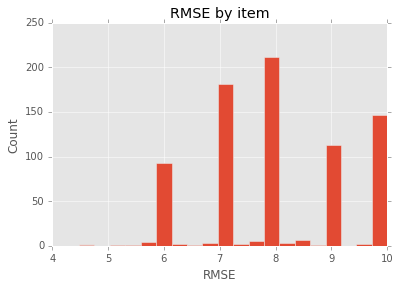

In [32]:
# Plotting RMSE by item
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
rmsevals=rmse_results['rmse_by_item']['rmse']
plt.hist(rmsevals, bins=20)
plt.xlabel('RMSE')
plt.ylabel('Count')
plt.title('RMSE by item')
plt.show()

##### RMSE by item of Item_Item model is also worst in recommending rating of book.

#### RMSE Results by User for Item-Item Similarity

In [33]:
# Printing RMSE by user 
rmse_results['rmse_by_user']

Columns:
	User-ID	int
	count	int
	rmse	float

Rows: 364

Data:
+---------+-------+---------------+
| User-ID | count |      rmse     |
+---------+-------+---------------+
|  21045  |   1   |      7.0      |
|  163409 |   1   |      8.0      |
|  234288 |   1   |      8.0      |
|  32516  |   4   | 9.53939201417 |
|  75096  |   1   |      10.0     |
|  31820  |   1   |      6.0      |
|  128782 |   3   | 7.72442015084 |
|  94445  |   1   |      6.0      |
|  127244 |   1   | 9.99719079614 |
|  179922 |   1   |      6.0      |
+---------+-------+---------------+
[364 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

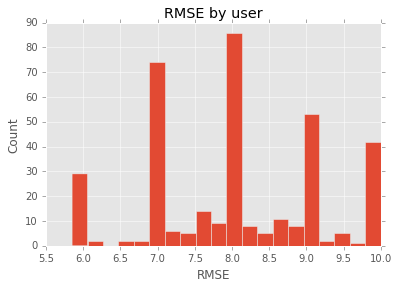

In [34]:
#Plotting RMSE by user
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
rmsevals=rmse_results['rmse_by_user']['rmse']
plt.hist(rmsevals, bins=20)
plt.xlabel('RMSE')
plt.ylabel('Count')
plt.title('RMSE by user')
plt.show()

##### RMSE by user of Item_Item model is worst in recommending rating of book.

### Recall and Precision

Another evaluation criterion is the per-user-recall or the per-user-precision. 
Precision (also called positive predictive value) is the fraction of retrieved instances that are recommended by our model that are relevant to user, while recall (also known as sensitivity) is the fraction of relevant instances that are retrieved by our model. 


In [111]:
## printing precision and recall by cutoff
precision_recall_by_user=rmse_results['precision_recall_by_user']
precision_recall_by_user.print_rows(num_rows=10, num_columns=5, max_column_width=30, max_row_width=80, output_file=None)


+---------+--------+-----------+--------+-------+
| User-ID | cutoff | precision | recall | count |
+---------+--------+-----------+--------+-------+
|    99   |   1    |    0.0    |  0.0   |   1   |
|    99   |   2    |    0.0    |  0.0   |   1   |
|    99   |   3    |    0.0    |  0.0   |   1   |
|    99   |   4    |    0.0    |  0.0   |   1   |
|    99   |   5    |    0.0    |  0.0   |   1   |
|    99   |   6    |    0.0    |  0.0   |   1   |
|    99   |   7    |    0.0    |  0.0   |   1   |
|    99   |   8    |    0.0    |  0.0   |   1   |
|    99   |   9    |    0.0    |  0.0   |   1   |
|    99   |   10   |    0.0    |  0.0   |   1   |
+---------+--------+-----------+--------+-------+
[6552 rows x 5 columns]



#### Aggregate values of precision, recall, and Standard deviation by Cutoff

In [36]:
import graphlab.aggregate as agg

# we will be using these aggregations for comparison
agg_list = [agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')]

# apply these functions to each group (we will group the results by 'k' which is the cutoff)
# the cutoff is the number of top items to look for. 
rmse_results['precision_recall_by_user'].groupby('cutoff',agg_list)

# the groups are not sorted

Columns:
	cutoff	int
	Avg of precision	float
	Stdv of precision	float
	Avg of recall	float
	Stdv of recall	float

Rows: 18

Data:
+--------+------------------+-------------------+------------------+
| cutoff | Avg of precision | Stdv of precision |  Avg of recall   |
+--------+------------------+-------------------+------------------+
|   36   | 0.00114468864469 |  0.00657307823036 | 0.0234606663178  |
|   2    | 0.00412087912088 |  0.0584558319532  | 0.00124280481423 |
|   46   | 0.00107501194458 |  0.00547760128418 | 0.0298709227281  |
|   31   | 0.00115207373272 |  0.00727934457445 | 0.0179661608233  |
|   26   | 0.00137362637363 |  0.00867921853108 | 0.0179661608233  |
|   8    | 0.00274725274725 |  0.0243600932019  | 0.00743502529217 |
|   5    | 0.0032967032967  |   0.03616369818   | 0.00575614861329 |
|   16   | 0.00171703296703 |  0.0129905771424  |  0.011555904413  |
|   41   | 0.00120611096221 |  0.00614560144079 | 0.0298709227281  |
|   4    | 0.00343406593407 |  0.0433237054613  | 0.00438252223967 |
+--------+------------------+-------------------+------------------+
+-----------------+
|  Stdv of recall |
+-----------------+
|  0.137526834492 |
| 0.0172925863564 |
|  0.156113794537 |
|  0.116819281971 |
|  0.116819281971 |
| 0.0684136407455 |
| 0.0631018439263 |
| 0.0896450380579 |
|  0.156113794537 |
| 0.0575235279321 |
+-----------------+
[18 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

##### Item-Item model’s Avg Precision and Recall are not good and we should try to improve our model by using user-item model



## 5.3.2.  Evaluating User-Item Similarity Recommender

### 5.3.2.1. User-Item Similarity Recommender with Default Parameters

In [37]:
# Create a base User-item recommendation model
m1 = gl.recommender.ranking_factorization_recommender.create(train, 
                                  user_id="User-ID", 
                                  item_id="Book-Title", 
                                  target="Book-Rating")

rmse_results =m1.evaluate(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 383031 observations with 67978 users and 135383 items.

Data prepared in: 0.554497s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 47878 / 383031 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | 3.71509                                  |

| 5       | 0.0488281         | 4.35995                                  |

| 6       | 0.0244141         | 4.93511                                  |

| 7       | 0.012207          | 5.42515                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0976562         | 3.71509                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 76us         | 6.65365           | 1.84221               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 363.677ms    | 6.06243           | 1.81107               | 0.0976562   |

| 2       | 684.65ms     | 5.17333           | 1.64179               | 0.0580668   |

| 3       | 1.02s        | 4.46904           | 1.47473               | 0.042841    |

| 4       | 1.34s        | 3.72554           | 1.27348               | 0.0345267   |

| 5       | 1.68s        | 3.12828           | 1.10166               | 0.029206    |

| 6       | 2.02s        | 2.70089           | 0.974348              | 0.0254734   |

| 10      | 3.30s        | 1.78153           | 0.67916               | 0.017366    |

| 11      | 3.80s        | 1.65903           | 0.638488              | 0.016168    |

| 15      | 5.13s        | 1.33509           | 0.524359              | 0.0128124   |

| 20      | 7.30s        | 1.11671           | 0.446653              | 0.0103259   |

| 25      | 9.55s        | 0.980058          | 0.398697              | 0.00873464  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.949095

Final training RMSE: 0.366653


Precision and recall summary statistics by cutoff
+--------+----------------+-------------+
| cutoff | mean_precision | mean_recall |
+--------+----------------+-------------+
|   1    |      0.0       |     0.0     |
|   2    |      0.0       |     0.0     |
|   3    |      0.0       |     0.0     |
|   4    |      0.0       |     0.0     |
|   5    |      0.0       |     0.0     |
|   6    |      0.0       |     0.0     |
|   7    |      0.0       |     0.0     |
|   8    |      0.0       |     0.0     |
|   9    |      0.0       |     0.0     |
|   10   |      0.0       |     0.0     |
+--------+----------------+-------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 2.924344401503368)

Per User RMSE (best)
+---------+-------+------------------+
| User-ID | count |       rmse       |
+---------+-------+------------------+
|  72101  |   1   | 0.00101472152585 |
+---------+-------+------------------+
[1 rows x 3 columns]


Per User RMSE (worst)
+---------+-------+---------------+


#### RMSE Results by Item for User-Item Similarity with Default Parameters

In [38]:
print rmse_results.viewkeys()
print rmse_results['rmse_by_item']

dict_keys(['rmse_by_user', 'precision_recall_overall', 'rmse_by_item', 'precision_recall_by_user', 'rmse_overall'])
+-------------------------------+-------+----------------+
|           Book-Title          | count |      rmse      |
+-------------------------------+-------+----------------+
|        House of Echoes        |   1   | 4.02309819771  |
| Small Gods (Discworld Nove... |   1   | 4.54861357523  |
| Crowner'S Quest : A Crowne... |   1   |  4.4940809281  |
| The Adventures of Hucklebe... |   1   | 0.277145511525 |
| Ophelia Speaks : Adolescen... |   1   | 7.48605259968  |
| My Land: A Homesteader's Tale |   1   | 0.625813576447 |
| The Adventures Pete and Ma... |   1   | 0.107231828438 |
| The Bear and the Dragon (J... |   1   | 0.304125580059 |
|       A Southern Family       |   1   | 0.464159761501 |
| Jenny Dale's Puppy Patrol ... |   1   | 0.107231828438 |
+-------------------------------+-------+----------------+
[777 rows x 3 columns]
Note: Only the head of the SFrame i

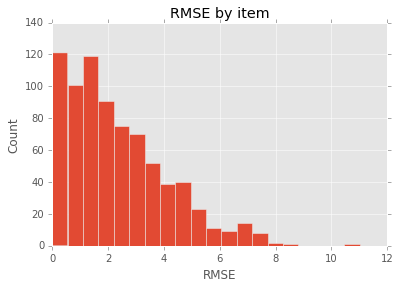

In [39]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
rmsevals=rmse_results['rmse_by_item']['rmse']
plt.hist(rmsevals, bins=20)
plt.xlabel('RMSE')
plt.ylabel('Count')
plt.title('RMSE by item')
plt.show()

##### As per the above plot, RMSE by item has improved substantially with user-item recommendation model.

#### RMSE Results by User for User-Item Similarity with Default Parameters

In [40]:
print rmse_results.viewkeys()
print rmse_results['rmse_by_user']

dict_keys(['rmse_by_user', 'precision_recall_overall', 'rmse_by_item', 'precision_recall_by_user', 'rmse_overall'])
+---------+-------+-----------------+
| User-ID | count |       rmse      |
+---------+-------+-----------------+
|  21045  |   1   |  1.01427557232  |
|  163409 |   1   |  0.277145511525 |
|  234288 |   1   |  1.70193555666  |
|  32516  |   4   |  2.07997636268  |
|  75096  |   1   |  1.19704270078  |
|  31820  |   1   |  1.29127104865  |
|  128782 |   3   |  2.73475033299  |
|  94445  |   1   | 0.0157295195926 |
|  127244 |   1   | 0.0335496394504 |
|  179922 |   1   |  0.87520650314  |
+---------+-------+-----------------+
[364 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


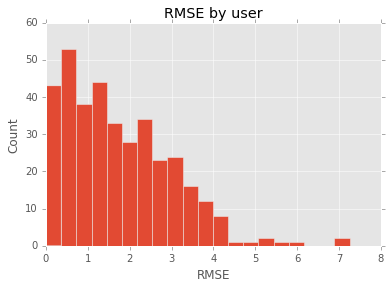

In [41]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
rmsevals=rmse_results['rmse_by_user']['rmse']
plt.hist(rmsevals, bins=20)
plt.xlabel('RMSE')
plt.ylabel('Count')
plt.title('RMSE by user')
plt.show()

##### As per the above plot, RMSE by user has improved substantially with user-item recommendation model.

##### So, for the user-item similarity model with Default Parameters  , the best RMSE per item is  0.001014 and worst is 11.017 . Whereas the best RMSE per user is  0.001014  and worst is 7.2549.  The overall RMSE value is 2.92.

#### Aggregate values of precision, recall, and Standard deviation by Cutoff

In [42]:
rmse_results['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')])

Columns:
	cutoff	int
	Avg of precision	float
	Stdv of precision	float
	Avg of recall	float
	Stdv of recall	float

Rows: 18

Data:
+--------+-------------------+-------------------+-------------------+
| cutoff |  Avg of precision | Stdv of precision |   Avg of recall   |
+--------+-------------------+-------------------+-------------------+
|   36   |  0.00106837606838 |  0.00534188034188 |  0.0245225013082  |
|   2    |        0.0        |        0.0        |        0.0        |
|   46   |  0.0011944577162  |  0.00495376047619 |  0.0355115122972  |
|   31   | 0.000974831619993 |  0.00552230790546 |  0.0216836734694  |
|   26   | 0.000739644970414 |  0.00528212161874 |  0.0148155416013  |
|   8    |        0.0        |        0.0        |        0.0        |
|   5    |        0.0        |        0.0        |        0.0        |
|   16   | 0.000171703296703 |  0.00327138717089 | 0.000686813186813 |
|   41   |  0.00100509246851 |  0.0048481171171  |  0.0272697540555  |
|   4    |        0.0        |        0.0        |        0.0        |
+--------+-------------------+-------------------+-------------------+
+-----------------+
|  Stdv of recall |
+-----------------+
|  0.142620834113 |
|       0.0       |
|  0.170155710777 |
|  0.139175860322 |
|  0.11723708092  |
|       0.0       |
|       0.0       |
| 0.0130855486836 |
|  0.151478277831 |
|       0.0       |
+-----------------+
[18 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

** So, this is getting better, but we might need to tune the model parameters by overriding default parameters. **

### 5.3.2.2. User-Item Similarity Recommender with User-Inputted Parameters

In [43]:
# Create a User-item recommendation model by overriding parameters.
m2 = gl.recommender.ranking_factorization_recommender.create(train, 
                                  user_id="User-ID", 
                                  item_id="Book-Title", 
                                  target="Book-Rating",
                                  num_factors=16,                 # override the default value
                                  regularization=0.01,           # override the default value
                                  linear_regularization = 0.001)   # override the default value

rmse_results = m2.evaluate(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 383031 observations with 67978 users and 135383 items.

Data prepared in: 0.715591s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 16       |

| regularization                 | L2 Regularization on Factors                     | 0.01     |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 0.001    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 47878 / 383031 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.0192349         | Not Viable                               |

| 1       | 0.00480873        | 6.29215                                  |

| 2       | 0.00240436        | 6.35619                                  |

| 3       | 0.00120218        | 6.41602                                  |

| 4       | 0.000601091       | 6.46196                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.00480873        | 6.29215                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 84us         | 6.6537            | 1.84221               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 475.891ms    | DIVERGED          | DIVERGED              | 0.00480873  |

| RESET   | 714.633ms    | 6.65324           | 1.84221               |             |

| 1       | 1.16s        | DIVERGED          | DIVERGED              | 0.00240436  |

| RESET   | 1.39s        | 6.65335           | 1.84221               |             |

| 1       | 1.69s        | 6.49595           | 1.80133               | 0.00120218  |

| 2       | 2.32s        | 6.39902           | 1.78058               | 0.000214494 |

| 3       | 2.88s        | 6.38814           | 1.77723               | 0.000117752 |

| 4       | 3.46s        | 6.3855            | 1.77559               | 8.11507e-05 |

| 5       | 4.17s        | 6.38396           | 1.77482               | 6.19078e-05 |

| 6       | 4.82s        | 6.38359           | 1.77404               | 5.00416e-05 |

| 8       | 6.19s        | 6.38285           | 1.77299               | 3.61742e-05 |

| 11      | 7.89s        | 6.38297           | 1.77202               | 2.53296e-05 |

| 13      | 8.87s        | 6.38318           | 1.77155               | 2.09963e-05 |

| 18      | 11.16s       | 6.38369           | 1.77065               | 1.29334e-05 |

| 23      | 13.94s       | 6.38364           | 1.77028               | 4.52464e-06 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 6.38391

Final training RMSE: 1.77023


Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--------+-------------------+-------------------+
|   1    |  0.00274725274725 | 0.000137362637363 |
|   2    |  0.00137362637363 | 0.000137362637363 |
|   3    | 0.000915750915751 | 0.000137362637363 |
|   4    | 0.000686813186813 | 0.000137362637363 |
|   5    |  0.0010989010989  |  0.00151098901099 |
|   6    | 0.000915750915751 |  0.00151098901099 |
|   7    | 0.000784929356358 |  0.00151098901099 |
|   8    |  0.00137362637363 |  0.00700549450549 |
|   9    |   0.001221001221  |  0.00700549450549 |
|   10   |  0.0010989010989  |  0.00700549450549 |
+--------+-------------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 1.3671655007700338)

Per User RMSE (best)
+---------+-------+------------------+
| User-ID | count |       rmse       |
+---------+-------+------------------+
|  251439 |   1   | 0.0028732057

#### With User-Item Model, RMSE has improved and is equal to 1.367

#### RMSE Results by Item for User-Item Similarity with User-Inputed Parameters

In [44]:
print rmse_results.viewkeys()
print rmse_results['rmse_by_item']

dict_keys(['rmse_by_user', 'precision_recall_overall', 'rmse_by_item', 'precision_recall_by_user', 'rmse_overall'])
+-------------------------------+-------+----------------+
|           Book-Title          | count |      rmse      |
+-------------------------------+-------+----------------+
|        House of Echoes        |   1   |  1.4006896675  |
| Small Gods (Discworld Nove... |   1   |  1.8094740556  |
| Crowner'S Quest : A Crowne... |   1   | 0.817484226955 |
| The Adventures of Hucklebe... |   1   | 0.333601116149 |
| Ophelia Speaks : Adolescen... |   1   | 2.43164396234  |
| My Land: A Homesteader's Tale |   1   | 0.625813576447 |
| The Adventures Pete and Ma... |   1   | 0.37257207913  |
| The Bear and the Dragon (J... |   1   | 0.377268413028 |
|       A Southern Family       |   1   | 1.57914030837  |
| Jenny Dale's Puppy Patrol ... |   1   | 0.37257207913  |
+-------------------------------+-------+----------------+
[777 rows x 3 columns]
Note: Only the head of the SFrame i

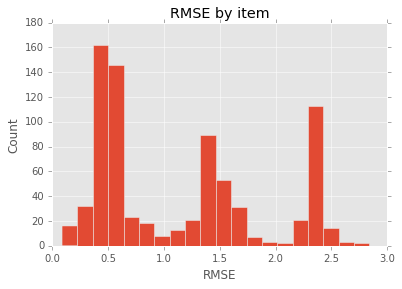

In [45]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
rmsevals=rmse_results['rmse_by_item']['rmse']
plt.hist(rmsevals, bins=20)
plt.xlabel('RMSE')
plt.ylabel('Count')
plt.title('RMSE by item')
plt.show()

##### As per the above plot, RMSE by item has improved further with user-item recommendation model

#### RMSE Results by User for User-Item Similarity with User-Inputted Parameters

In [46]:
print rmse_results.viewkeys()
print rmse_results['rmse_by_user']

dict_keys(['rmse_by_user', 'precision_recall_overall', 'rmse_by_item', 'precision_recall_by_user', 'rmse_overall'])
+---------+-------+----------------+
| User-ID | count |      rmse      |
+---------+-------+----------------+
|  21045  |   1   | 0.63327360438  |
|  163409 |   1   | 0.333601116149 |
|  234288 |   1   | 0.454876911772 |
|  32516  |   4   | 2.07001779375  |
|  75096  |   1   | 2.33202209877  |
|  31820  |   1   | 1.51344071613  |
|  128782 |   3   | 0.951727807227 |
|  94445  |   1   | 1.60324370028  |
|  127244 |   1   |  2.1543936701  |
|  179922 |   1   | 1.62170893052  |
+---------+-------+----------------+
[364 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


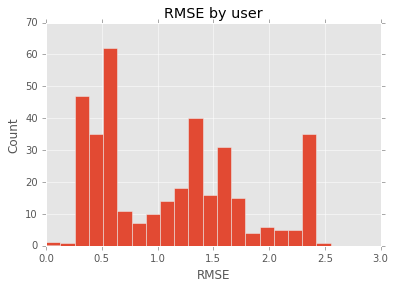

In [47]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
rmsevals=rmse_results['rmse_by_user']['rmse']
plt.hist(rmsevals, bins=20)
plt.xlabel('RMSE')
plt.ylabel('Count')
plt.title('RMSE by user')
plt.show()

##### As per the above plot, RMSE by user has improved further with user-item recommendation model

##### So, for the user-item model with user supplied parameters  , the best RMSE per item is  0.0869 and worst is 2.83 . Whereas the best RMSE per user is  0.0059 and worst is 2.545.  The overall RMSE value is 1.3670.

###  Models Comparison 

#### Comparison by RMSE

In [48]:
comparisons = gl.recommender.util.compare_models(test, [item_item, m1, m2])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+------------------+-------------------+
| cutoff |  mean_precision  |    mean_recall    |
+--------+------------------+-------------------+
|   1    | 0.00274725274725 | 0.000392464678179 |
|   2    | 0.00412087912088 |  0.00124280481423 |
|   3    | 0.00457875457875 |  0.00438252223967 |
|   4    | 0.00343406593407 |  0.00438252223967 |
|   5    | 0.0032967032967  |  0.00575614861329 |
|   6    | 0.00320512820513 |  0.00606139891854 |
|   7    | 0.00313971742543 |  0.00743502529217 |
|   8    | 0.00274725274725 |  0.00743502529217 |
|   9    | 0.00274725274725 |  0.0101822780394  |
|   10   | 0.00247252747253 |  0.0101822780394  |
+--------+------------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 8.131246243103114)

Per User RMSE (best)
+---------+-------+---------------+
| User-ID | count |      rmse     |
+---------+-------+---------------+
|  201353 |   9   | 5.851254

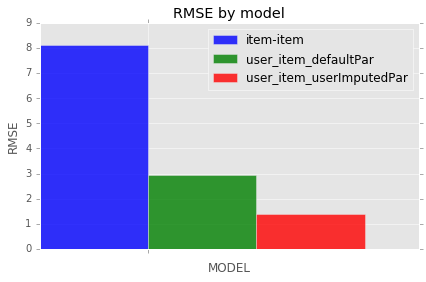

In [82]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# Root mean square error(RMSE)
n_groups = 1
ItemItem = (8.1311)
user_item_defaultPar = (2.924)
user_item_userImputedPar = (1.367)

 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.8
 
rects1 = plt.bar(index, ItemItem, bar_width,
                 alpha=opacity,
                 color='b',
                 label='item-item')
 
rects2 = plt.bar(index + bar_width, user_item_defaultPar, bar_width,
                 alpha=opacity,
                 color='g',
                 label='user_item_defaultPar')
rects3 = plt.bar(index + bar_width+bar_width, user_item_userImputedPar, bar_width,
                 alpha=opacity,
                 color='r',
                 label='user_item_userImputedPar')
 
plt.xlabel('MODEL')
plt.ylabel('RMSE')
plt.title('RMSE by model')
plt.xticks(index + bar_width, ('', '', '', ''))
plt.legend()
 
plt.tight_layout()
plt.show()

##### User-item model with overridden parameters worked the best (RMSE=1.36) among three models based on overall RMSE. 

### Comparison by Precision and Recall cutoff

In [50]:
#Model Comparision 
model_comp = gl.compare(test, [item_item, m1, m2])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+------------------+-------------------+
| cutoff |  mean_precision  |    mean_recall    |
+--------+------------------+-------------------+
|   1    | 0.00274725274725 | 0.000392464678179 |
|   2    | 0.00412087912088 |  0.00124280481423 |
|   3    | 0.00457875457875 |  0.00438252223967 |
|   4    | 0.00343406593407 |  0.00438252223967 |
|   5    | 0.0032967032967  |  0.00575614861329 |
|   6    | 0.00320512820513 |  0.00606139891854 |
|   7    | 0.00313971742543 |  0.00743502529217 |
|   8    | 0.00274725274725 |  0.00743502529217 |
|   9    | 0.00274725274725 |  0.0101822780394  |
|   10   | 0.00247252747253 |  0.0101822780394  |
+--------+------------------+-------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+----------------+-------------+
| cutoff | mean_precision | mean_recall |
+--------+----------------+--------

In [51]:
## model comparsion by precision and recall
gl.show_comparison(model_comp,[item_item, m1, m2])
#gl.show_comparison(comparison,[item_item, m1, m2])

##### Item-item model's precision and recall are highest for lower cut off while user-item model's precision and recall are highest for higher cut off.

### 5.3.2.3. User-Item Similarity Recommender with Grid Search selected parameters

We found out that the user-item model with user overridden parameters values is best for recommendations of book ratings. Now we can finetune the best input parameters using Grid Search Method. 
 

In [52]:
## Searching best parameters
params = {'user_id': 'User-ID', 
          'item_id': 'Book-Title', 
          'target': 'Book-Rating',
          'num_factors': [8, 12, 16, 24, 32], 
          'regularization':[0.01] ,
          'linear_regularization': [0.001]}

job = gl.model_parameter_search.create( (train,test),
        gl.recommender.ranking_factorization_recommender.create,
        params,
        max_models=5,
        environment=None)



[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.job: Creating a LocalAsync environment called 'async'.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Apr-30-2017-17-57-2700000' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Apr-30-2017-17-57-2700000' scheduled.
[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: A job with name 'Model-Parameter-Search-Apr-30-2017-17-57-2700000' already exists. Renaming the job to 'Model-Parameter-Search-Apr-30-2017-17-57-2700000-5f02c'.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Apr-30-2017-17-57-2700000-5f02c' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Apr-30-2017-17-57-2700000-5f02c' scheduled.


In [53]:
#Print Job Status
job.get_status()

{'Canceled': 0, 'Completed': 0, 'Failed': 0, 'Pending': 5, 'Running': 0}

#### Overall Result

In [54]:
# printing the 5 models' parameters
job_result = job.get_results()
job_result.head()

Columns:
	model_id	int
	item_id	str
	linear_regularization	float
	max_iterations	int
	num_factors	int
	num_sampled_negative_examples	int
	ranking_regularization	float
	regularization	float
	target	str
	user_id	str
	training_precision@5	float
	training_recall@5	float
	training_rmse	float
	validation_precision@5	float
	validation_recall@5	float
	validation_rmse	float

Rows: 5

Data:
+----------+------------+-----------------------+----------------+-------------+
| model_id |  item_id   | linear_regularization | max_iterations | num_factors |
+----------+------------+-----------------------+----------------+-------------+
|    1     | Book-Title |         0.001         |       25       |      24     |
|    0     | Book-Title |         0.001         |       50       |      16     |
|    3     | Book-Title |         0.001         |       50       |      32     |
|    2     | Book-Title |         0.001         |       50       |      8      |
|    4     | Book-Title |         0.001         |       50       |      16     |
+----------+------------+-----------------------+----------------+-------------+
+-------------------------------+------------------------+----------------+
| num_sampled_negative_examples | ranking_regularization | regularization |
+-------------------------------+------------------------+----------------+
|               4               |          0.1           |      0.01      |
|               8               |          0.5           |      0.01      |
|               4               |          0.25          |      0.01      |
|               4               |          0.25          |      0.01      |
|               4               |          0.1           |      0.01      |
+-------------------------------+------------------------+----------------+
+-------------+---------+----------------------+-------------------+
|    target   | user_id | training_precision@5 | training_recall@5 |
+-------------+---------+----------------------+-------------------+
| Book-Rating | User-ID |   0.00416605372326   |  0.00361735023214 |
| Book-Rating | User-ID |   0.00416605372326   |  0.00361735023214 |
| Book-Rating | User-ID |   0.00416605372326   |  0.00361735023214 |
| Book-Rating | User-ID |   0.00416605372326   |  0.00361735023214 |
| Book-Rating | User-ID |   0.00416605372326   |  0.00361735023214 |
+-------------+---------+----------------------+-------------------+
+---------------+------------------------+---------------------+-----------------+
| training_rmse | validation_precision@5 | validation_recall@5 | validation_rmse |
+---------------+------------------------+---------------------+-----------------+
| 1.74816797719 |    0.0010989010989     |   0.00151098901099  |  1.35053642891  |
| 1.82053188351 |    0.0010989010989     |   0.00151098901099  |  1.40062095947  |
| 1.77065290053 |    0.0010989010989     |   0.00151098901099  |  1.36711233333  |
| 1.77017189746 |    0.0010989010989     |   0.00151098901099  |  1.36701293558  |
| 1.74862238309 |    0.0010989010989     |   0.00151098901099  |  1.35081291328  |
+---------------+------------------------+---------------------+-----------------+
[5 rows x 16 columns]

For each model, it calculated average RMSE, Precision and Recall on the training and test set.

###  Best Parameters 

In [55]:
# Printing the best parameters
bst_prms = job.get_best_params()
bst_prms

{'item_id': 'Book-Title',
 'linear_regularization': 0.001,
 'max_iterations': 25,
 'num_factors': 24,
 'num_sampled_negative_examples': 4,
 'ranking_regularization': 0.1,
 'regularization': 0.01,
 'target': 'Book-Rating',
 'user_id': 'User-ID'}

### Printing the five models' information

In [56]:
## printing the five model's detail information
models = job.get_models()
models

[Class                            : RankingFactorizationRecommender
 
 Schema
 ------
 User ID                          : User-ID
 Item ID                          : Book-Title
 Target                           : Book-Rating
 Additional observation features  : 0
 User side features               : []
 Item side features               : []
 
 Statistics
 ----------
 Number of observations           : 383031
 Number of users                  : 67978
 Number of items                  : 135383
 
 Training summary
 ----------------
 Training time                    : 18.8204
 
 Model Parameters
 ----------------
 Model class                      : RankingFactorizationRecommender
 num_factors                      : 16
 binary_target                    : 0
 side_data_factorization          : 1
 solver                           : auto
 nmf                              : 0
 max_iterations                   : 50
 
 Regularization Settings
 -----------------------
 regularization                 

#### Model Comparisions

In [57]:
## Printing precision and recall to compare the five grid search models
comparisonstruct = gl.compare(test,models)

## plotting the recall-precision graph to compare the models
gl.show_comparison(comparisonstruct,models)

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--------+-------------------+-------------------+
|   1    |  0.00274725274725 | 0.000137362637363 |
|   2    |  0.00137362637363 | 0.000137362637363 |
|   3    | 0.000915750915751 | 0.000137362637363 |
|   4    | 0.000686813186813 | 0.000137362637363 |
|   5    |  0.0010989010989  |  0.00151098901099 |
|   6    | 0.000915750915751 |  0.00151098901099 |
|   7    |  0.00156985871272 |  0.00700549450549 |
|   8    |  0.00137362637363 |  0.00700549450549 |
|   9    |   0.001221001221  |  0.00700549450549 |
|   10   |  0.00137362637363 |  0.00713036963037 |
+--------+-------------------+-------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--

##### From the five models, **Model 1**  is the best model with respect to RMSE. However, other models are better in terms of precision and recall.

#### Printing Information for Model 1 (Best out  of the 5 Models)

In [84]:
models[1]

Class                            : RankingFactorizationRecommender

Schema
------
User ID                          : User-ID
Item ID                          : Book-Title
Target                           : Book-Rating
Additional observation features  : 0
User side features               : []
Item side features               : []

Statistics
----------
Number of observations           : 383031
Number of users                  : 67978
Number of items                  : 135383

Training summary
----------------
Training time                    : 11.2977

Model Parameters
----------------
Model class                      : RankingFactorizationRecommender
num_factors                      : 24
binary_target                    : 0
side_data_factorization          : 1
solver                           : auto
nmf                              : 0
max_iterations                   : 25

Regularization Settings
-----------------------
regularization                   : 0.01
regularization_type      

# 6. Final Model Evaluation

At this stage in the project we have built a model (or models) that appears to have high quality, from a data analysis perspective. We compared item-item similarity model, user-item with default parameter model, and user-item with user controlled parameters model. We used RMSE, precision, and recall values as our evaluation criteria. Hence, among the models, we found out that the user-item with controlled parameters model works the best. Then we finetuned the best parameters to use as an input for the user-item model. 

Now let's evaluate our final model with the best parameters inputted.  

In [59]:
final_model = gl.recommender.ranking_factorization_recommender.create(train, 
                                                                      user_id='User-ID', 
                                                                      item_id='Book-Title', 
                                                                      target="Book-Rating",
                                                                      num_factors=24, 
                                                                      regularization=0.01, 
                                                                      linear_regularization=0.001,  
                                                                      ranking_regularization=0.1, 
                                                                      unobserved_rating_value=-1.79769313486e+308, 
                                                                      num_sampled_negative_examples=4,
                                                                      side_data_factorization=1,
                                                                      max_iterations=25, 
                                                                      sgd_step_size=0, 
                                                                      random_seed=0, 
                                                                      binary_target=False, 
                                                                      solver='auto')

                                                                       

rmse_results = final_model.evaluate(test)
                                        

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 383031 observations with 67978 users and 135383 items.

Data prepared in: 0.779839s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 24       |

| regularization                 | L2 Regularization on Factors                     | 0.01     |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 0.001    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.1      |

| unobserved_rating_value        | Ranking Target Rating for Unobserved Interacti...| -2e+308  |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 47878 / 383031 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.0192349         | Not Viable                               |

| 1       | 0.00480873        | 4.43501                                  |

| 2       | 0.00240436        | 4.49107                                  |

| 3       | 0.00120218        | 4.54219                                  |

| 4       | 0.000601091       | 4.58029                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.00480873        | 4.43501                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 111us        | 4.69776           | 1.84221               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 729.136ms    | DIVERGED          | DIVERGED              | 0.00480873  |

| RESET   | 1.06s        | 4.69756           | 1.84221               |             |

| 1       | 1.82s        | DIVERGED          | DIVERGED              | 0.00240436  |

| RESET   | 2.16s        | 4.6976            | 1.84221               |             |

| 1       | 2.66s        | 4.58236           | 1.78841               | 0.00120218  |

| 2       | 3.10s        | 4.50363           | 1.76244               | 0.000214494 |

| 3       | 3.56s        | 4.49637           | 1.75794               | 0.000117752 |

| 4       | 3.96s        | 4.49417           | 1.75566               | 8.11507e-05 |

| 5       | 4.31s        | 4.49327           | 1.75441               | 6.19078e-05 |

| 6       | 4.68s        | 4.49284           | 1.75337               | 5.00416e-05 |

| 8       | 5.40s        | 4.49242           | 1.75188               | 3.61742e-05 |

| 11      | 6.59s        | 4.49254           | 1.7505                | 2.53296e-05 |

| 13      | 7.27s        | 4.49274           | 1.74984               | 2.09963e-05 |

| 18      | 8.89s        | 4.49281           | 1.74874               | 8.64909e-06 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Convergence on objective within bounds.

Computing final objective value and training RMSE.

Final objective value: 4.49323

Final training RMSE: 1.74887


Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--------+-------------------+-------------------+
|   1    |  0.00274725274725 | 0.000137362637363 |
|   2    |  0.00137362637363 | 0.000137362637363 |
|   3    | 0.000915750915751 | 0.000137362637363 |
|   4    | 0.000686813186813 | 0.000137362637363 |
|   5    |  0.0010989010989  |  0.00151098901099 |
|   6    | 0.000915750915751 |  0.00151098901099 |
|   7    |  0.00156985871272 |  0.00700549450549 |
|   8    |  0.00137362637363 |  0.00700549450549 |
|   9    |   0.001221001221  |  0.00700549450549 |
|   10   |  0.0010989010989  |  0.00700549450549 |
+--------+-------------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 1.3507590398453204)

Per User RMSE (best)
+---------+-------+-----------------+
| User-ID | count |       rmse      |
+---------+-------+-----------------+
|  251439 |   1   | 0.0127781408416

#### RMSE Results by Item for User-Item Similarity-Final Model

In [60]:
# printing RMSE values by item for the final model
print rmse_results.viewkeys()
print rmse_results['rmse_by_item']

dict_keys(['rmse_by_user', 'precision_recall_overall', 'rmse_by_item', 'precision_recall_by_user', 'rmse_overall'])
+-------------------------------+-------+----------------+
|           Book-Title          | count |      rmse      |
+-------------------------------+-------+----------------+
|        House of Echoes        |   1   | 1.38594008313  |
| Small Gods (Discworld Nove... |   1   | 1.64752795635  |
| Crowner'S Quest : A Crowne... |   1   | 0.66408967687  |
| The Adventures of Hucklebe... |   1   | 0.328969602972 |
| Ophelia Speaks : Adolescen... |   1   | 2.40749126225  |
| My Land: A Homesteader's Tale |   1   | 0.625813576447 |
| The Adventures Pete and Ma... |   1   | 0.371428328047 |
| The Bear and the Dragon (J... |   1   | 0.373958523855 |
|       A Southern Family       |   1   | 1.59500061167  |
| Jenny Dale's Puppy Patrol ... |   1   | 0.371428328047 |
+-------------------------------+-------+----------------+
[777 rows x 3 columns]
Note: Only the head of the SFrame i

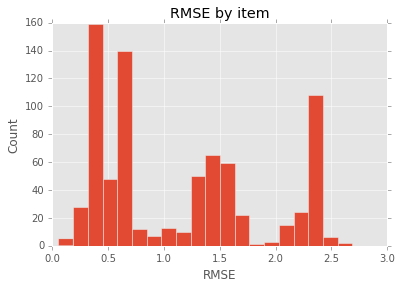

In [61]:
# plotting RMSE values by item for the final model
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
rmsevals=rmse_results['rmse_by_item']['rmse']
plt.hist(rmsevals, bins=20)
plt.xlabel('RMSE')
plt.ylabel('Count')
plt.title('RMSE by item')
plt.show()

##### As per the above plot, RMSE by item has improved further with user-item recommendation model with tuned parameters .

#### RMSE Results by User for User-Item Similarity-Final Model

In [62]:
# printing RMSE values by user for the final model
print rmse_results.viewkeys()
print rmse_results['rmse_by_user']

dict_keys(['rmse_by_user', 'precision_recall_overall', 'rmse_by_item', 'precision_recall_by_user', 'rmse_overall'])
+---------+-------+----------------+
| User-ID | count |      rmse      |
+---------+-------+----------------+
|  21045  |   1   | 0.639266308684 |
|  163409 |   1   | 0.328969602972 |
|  234288 |   1   | 0.423742712043 |
|  32516  |   4   | 2.05835162209  |
|  75096  |   1   | 2.31930873282  |
|  31820  |   1   | 1.51455154974  |
|  128782 |   3   | 0.94824014511  |
|  94445  |   1   | 1.61171763815  |
|  127244 |   1   | 2.16777986003  |
|  179922 |   1   | 1.62334517395  |
+---------+-------+----------------+
[364 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


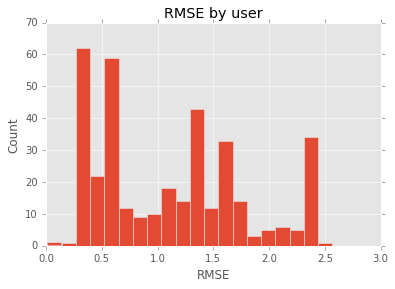

In [63]:
# plotting RMSE values by user for the final model
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
rmsevals=rmse_results['rmse_by_user']['rmse']
plt.hist(rmsevals, bins=20)
plt.xlabel('RMSE')
plt.ylabel('Count')
plt.title('RMSE by user')
plt.show()

##### As per the above plot, RMSE by user has improved further with user-item recommendation model with tuned parameters .

The overall RMSE value for the user-item with best parameters recommendation model is 1.35, which is the smallest value compared to the previous model. This is compared using the following bar graph.

### Comparison of Final Model with the Previous Models by RMSE

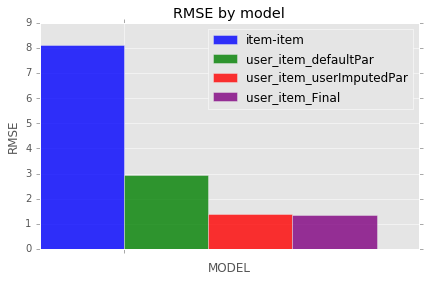

In [85]:
# comparison of final model with previous models
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# Root mean square error(RMSE)
n_groups = 1
ItemItem = (8.1311)
user_item_defaultPar = (2.924)
user_item_userImputedPar = (1.367)
user_item_Final = (1.35)

 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.8
 
rects1 = plt.bar(index, ItemItem, bar_width,
                 alpha=opacity,
                 color='b',
                 label='item-item')
 
rects2 = plt.bar(index + bar_width, user_item_defaultPar, bar_width,
                 alpha=opacity,
                 color='g',
                 label='user_item_defaultPar')
rects3 = plt.bar(index + bar_width+bar_width, user_item_userImputedPar, bar_width,
                 alpha=opacity,
                 color='r',
                 label='user_item_userImputedPar')
rects4 = plt.bar(index + bar_width+bar_width+bar_width, user_item_Final, bar_width,
                 alpha=opacity,
                 color='purple',
                 label='user_item_Final')


 
plt.xlabel('MODEL')
plt.ylabel('RMSE')
plt.title('RMSE by model')
plt.xticks(index + bar_width, ('', '', '', ''))
plt.legend()
 
plt.tight_layout()
plt.show()

Taking RMSE value as a measurer criteria, the user-item-final model has the lowest RMSE. 

### Comparison of Final Model with the Previous Models by Precision , Recall and Cutoff

In [65]:
# printing precision and recall for the all models
comparisonstruct = gl.compare(test, [item_item, m1, m2,final_model])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+------------------+-------------------+
| cutoff |  mean_precision  |    mean_recall    |
+--------+------------------+-------------------+
|   1    | 0.00274725274725 | 0.000392464678179 |
|   2    | 0.00412087912088 |  0.00124280481423 |
|   3    | 0.00457875457875 |  0.00438252223967 |
|   4    | 0.00343406593407 |  0.00438252223967 |
|   5    | 0.0032967032967  |  0.00575614861329 |
|   6    | 0.00320512820513 |  0.00606139891854 |
|   7    | 0.00313971742543 |  0.00743502529217 |
|   8    | 0.00274725274725 |  0.00743502529217 |
|   9    | 0.00274725274725 |  0.0101822780394  |
|   10   | 0.00247252747253 |  0.0101822780394  |
+--------+------------------+-------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+----------------+-------------+
| cutoff | mean_precision | mean_recall |
+--------+----------------+--------

In [66]:
## plotting precision and recall values to compare final model with the previous
gl.show_comparison(comparisonstruct,[item_item, m1, m2,final_model])

##### Item-item model's precision and recall are highest for lower cut off while user-item model's precision and recall are highest for higher cut off.

## 6.1. The Final User-Item Recommendation Model

With the precision and recall criteria, the item-item similarity model came out to be a good model. Which means that  it is better in recommending books, however, it cannot predict book ratings as good. For that reason, we consider the RMSE as the best measure to evaluate our models. And with RMSE as a measure criteria, the user-item recommendation model with the tuned parameters came out to be the best. Therefore, we consider user-item model as our final recommendation model.

In [67]:
## Model for the user-item with best parameters inputed
final_model = gl.recommender.ranking_factorization_recommender.create(sf_TargetCols, 
                                                                      user_id='User-ID', 
                                                                      item_id='Book-Title', 
                                                                      target="Book-Rating",
                                                                      num_factors=24, 
                                                                      regularization=0.01, 
                                                                      linear_regularization=0.001,  
                                                                      ranking_regularization=0.1, 
                                                                      unobserved_rating_value=-1.79769313486e+308, 
                                                                      num_sampled_negative_examples=4,
                                                                      side_data_factorization=1,
                                                                      max_iterations=25, 
                                                                      sgd_step_size=0, 
                                                                      random_seed=0, 
                                                                      binary_target=False, 
                                                                      solver='auto')
                                      
# We Recommend books for every user using the final model
Recommendations = final_model.recommend(users=None, k=15)
Recommendations.print_rows(15)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 383839 observations with 68091 users and 135565 items.

Data prepared in: 0.702912s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 24       |

| regularization                 | L2 Regularization on Factors                     | 0.01     |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 0.001    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.1      |

| unobserved_rating_value        | Ranking Target Rating for Unobserved Interacti...| -2e+308  |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 47979 / 383839 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.0191944         | Not Viable                               |

| 1       | 0.0047986         | 4.41918                                  |

| 2       | 0.0023993         | 4.47522                                  |

| 3       | 0.00119965        | 4.52511                                  |

| 4       | 0.000599825       | 4.56318                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0047986         | 4.41918                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 1.14ms       | 4.69334           | 1.84135               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 471.422ms    | DIVERGED          | DIVERGED              | 0.0047986   |

| RESET   | 740.178ms    | 4.69313           | 1.84134               |             |

| 1       | 1.19s        | DIVERGED          | DIVERGED              | 0.0023993   |

| RESET   | 1.46s        | 4.69316           | 1.84134               |             |

| 1       | 1.78s        | 4.57587           | 1.78767               | 0.00119965  |

| 2       | 2.10s        | 4.49823           | 1.76195               | 0.000214043 |

| 3       | 2.41s        | 4.49122           | 1.75773               | 0.000117504 |

| 4       | 2.74s        | 4.48953           | 1.75574               | 8.09799e-05 |

| 5       | 3.05s        | 4.48852           | 1.7543                | 6.17775e-05 |

| 6       | 3.37s        | 4.4882            | 1.75329               | 4.99363e-05 |

| 8       | 3.98s        | 4.48777           | 1.75184               | 3.60981e-05 |

| 11      | 4.90s        | 4.48777           | 1.75035               | 2.52763e-05 |

| 13      | 5.52s        | 4.48798           | 1.74968               | 2.09521e-05 |

| 18      | 7.10s        | 4.48804           | 1.74856               | 8.63089e-06 |

| 23      | 8.62s        | 4.48798           | 1.74822               | 2.01922e-06 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Convergence on objective within bounds.

Computing final objective value and training RMSE.

Final objective value: 4.48806

Final training RMSE: 1.74819

recommendations finished on 1000/68091 queries. users per second: 530.42

recommendations finished on 2000/68091 queries. users per second: 527.58

recommendations finished on 3000/68091 queries. users per second: 525.664

recommendations finished on 4000/68091 queries. users per second: 524.832

recommendations finished on 5000/68091 queries. users per second: 523.367

recommendations finished on 6000/68091 queries. users per second: 522.765

recommendations finished on 7000/68091 queries. users per second: 522.232

recommendations finished on 8000/68091 queries. users per second: 522.297

recommendations finished on 9000/68091 queries. users per second: 522.498

recommendations finished on 10000/68091 queries. users per second: 522.759

recommendations finished on 11000/68091 queries. users per second: 523.438

recommendations finished on 12000/68091 queries. users per second: 523.456

recommendations finished on 13000/68091 queries. users per second: 523.498

recommendations finished on 14000/68091 queries. users per second: 523.686

recommendations finished on 15000/68091 queries. users per second: 523.865

recommendations finished on 16000/68091 queries. users per second: 524.066

recommendations finished on 17000/68091 queries. users per second: 524.017

recommendations finished on 18000/68091 queries. users per second: 524.233

recommendations finished on 19000/68091 queries. users per second: 524.574

recommendations finished on 20000/68091 queries. users per second: 524.749

recommendations finished on 21000/68091 queries. users per second: 524.929

recommendations finished on 22000/68091 queries. users per second: 525.16

recommendations finished on 23000/68091 queries. users per second: 524.995

recommendations finished on 24000/68091 queries. users per second: 525.088

recommendations finished on 25000/68091 queries. users per second: 525.175

recommendations finished on 26000/68091 queries. users per second: 525.347

recommendations finished on 27000/68091 queries. users per second: 525.59

recommendations finished on 28000/68091 queries. users per second: 525.709

recommendations finished on 29000/68091 queries. users per second: 525.913

recommendations finished on 30000/68091 queries. users per second: 526.168

recommendations finished on 31000/68091 queries. users per second: 526.293

recommendations finished on 32000/68091 queries. users per second: 526.388

recommendations finished on 33000/68091 queries. users per second: 526.565

recommendations finished on 34000/68091 queries. users per second: 526.628

recommendations finished on 35000/68091 queries. users per second: 526.667

recommendations finished on 36000/68091 queries. users per second: 526.66

recommendations finished on 37000/68091 queries. users per second: 526.692

recommendations finished on 38000/68091 queries. users per second: 526.858

recommendations finished on 39000/68091 queries. users per second: 526.866

recommendations finished on 40000/68091 queries. users per second: 526.933

recommendations finished on 41000/68091 queries. users per second: 527.115

recommendations finished on 42000/68091 queries. users per second: 527.07

recommendations finished on 43000/68091 queries. users per second: 527.222

recommendations finished on 44000/68091 queries. users per second: 527.233

recommendations finished on 45000/68091 queries. users per second: 524.958

recommendations finished on 46000/68091 queries. users per second: 524.769

recommendations finished on 47000/68091 queries. users per second: 524.805

recommendations finished on 48000/68091 queries. users per second: 524.934

recommendations finished on 49000/68091 queries. users per second: 524.852

recommendations finished on 50000/68091 queries. users per second: 524.872

recommendations finished on 51000/68091 queries. users per second: 523.875

recommendations finished on 52000/68091 queries. users per second: 521.266

recommendations finished on 53000/68091 queries. users per second: 519.623

recommendations finished on 54000/68091 queries. users per second: 518.617

recommendations finished on 55000/68091 queries. users per second: 518.715

recommendations finished on 56000/68091 queries. users per second: 518.761

recommendations finished on 57000/68091 queries. users per second: 518.814

recommendations finished on 58000/68091 queries. users per second: 518.739

recommendations finished on 59000/68091 queries. users per second: 518.759

recommendations finished on 60000/68091 queries. users per second: 518.809

recommendations finished on 61000/68091 queries. users per second: 518.84

recommendations finished on 62000/68091 queries. users per second: 518.921

recommendations finished on 63000/68091 queries. users per second: 519.056

recommendations finished on 64000/68091 queries. users per second: 519.126

recommendations finished on 65000/68091 queries. users per second: 519.171

recommendations finished on 66000/68091 queries. users per second: 519.312

recommendations finished on 67000/68091 queries. users per second: 519.363

recommendations finished on 68000/68091 queries. users per second: 516.683

+---------+-------------------------------+---------------+------+
| User-ID |           Book-Title          |     score     | rank |
+---------+-------------------------------+---------------+------+
|  276726 | Harry Potter and the Sorce... | 8.32683551167 |  1   |
|  276726 | Harry Potter and the Priso... | 8.32161772107 |  2   |
|  276726 | Harry Potter and the Goble... | 8.31070703124 |  3   |
|  276726 | Harry Potter and the Chamb... | 8.28653991078 |  4   |
|  276726 |     To Kill a Mockingbird     | 8.27501976346 |  5   |
|  276726 | Harry Potter and the Order... | 8.21279501771 |  6   |
|  276726 |       The Da Vinci Code       | 8.17122995709 |  7   |
|  276726 | Harry Potter and the Sorce... | 8.15366661404 |  8   |
|  276726 |    The Secret Life of Bees    | 8.15312182759 |  9   |
|  276726 | The Fellowship of the Ring... | 8.14711987828 |  10  |
|  276726 | The Two Towers (The Lord o... | 8.12617808436 |  11  |
|  276726 | Tuesdays with Morrie: An O... | 8.05812918996 |  1

In [68]:
## We recommend books for a specific user(with User-ID '251439' ) 
## using the final model 
rec_books_spUser = final_model.recommend(['251439'],k=15)
rec_books_spUser.print_rows(15)

+---------+-------------------------------+---------------+------+
| User-ID |           Book-Title          |     score     | rank |
+---------+-------------------------------+---------------+------+
|  251439 | Harry Potter and the Sorce... | 8.33568544431 |  1   |
|  251439 | Harry Potter and the Priso... | 8.33046765371 |  2   |
|  251439 | Harry Potter and the Goble... | 8.31955696388 |  3   |
|  251439 | Harry Potter and the Chamb... | 8.29538984342 |  4   |
|  251439 |     To Kill a Mockingbird     | 8.28386969609 |  5   |
|  251439 | Harry Potter and the Order... | 8.22164495034 |  6   |
|  251439 |       The Da Vinci Code       | 8.18007988973 |  7   |
|  251439 | Harry Potter and the Sorce... | 8.16251654668 |  8   |
|  251439 |    The Secret Life of Bees    | 8.16197176023 |  9   |
|  251439 | The Fellowship of the Ring... | 8.15596981092 |  10  |
|  251439 | The Two Towers (The Lord o... |  8.135028017  |  11  |
|  251439 | Tuesdays with Morrie: An O... | 8.06697912259 |  1

# 7. Exceptional Work

### 7.1 Using side features as SFrame in the ranking factorization recommender

In many cases, additional information about the users or items can improve the quality of the recommendations. For example, including information about the age of a user, publisher, and publishing year of a book can be useful information in recommending books. This type of information is  called **user side data(user side feature)** or **item side data (item side feature)** depending on whether it goes with the user or the item.

Including side data is easy with the user_data or item_data parameters to the *recommender.create()* function. These arguments are SFrames and must have a user or item column that corresponds to the user_id and item_id columns in the observation data. Internally, the data is joined to the particular user or item when training the model, the data is saved with the model and also used to make recommendations.

In particular, the *FactorizationRecommender* and the **RankingFactorizationRecommender** both incorporate the side data into the prediction through additional interaction terms between the user, the item, and the side feature. Both of these models also allow us to obtain the parameters that have been learned for each of the side features via the *m['coefficients']* argument.

We may also check the number of columns used as side information by querying *m['observation_column_names']*, *m['user_side_data_column_names']*, and *m['item_side_data_column_names']*. Moreover, by printing the model, we can see this information as well. 

Now, we are going to use **user's age** and **location** as side features for a user and **book publisher**, **year of book published**, **book author**, and **url** as side features for an item (book). [5][6]


### Side Features

In [69]:
## SFrames for side features for the user and item
user_side_info = sf_Users
item_side_info = sf_Books

In [70]:
# Printing top 10 records for user side features
#user side features
sf_Users.head()


Columns:
	User-ID	int
	Location	str
	Age	int

Rows: 10

Data:
+---------+--------------------------------+-----+
| User-ID |            Location            | Age |
+---------+--------------------------------+-----+
|    2    |   stockton, california, usa    |  18 |
|    4    |   porto, v.n.gaia, portugal    |  17 |
|    6    | santa monica, california, usa  |  61 |
|    10   |   albacete, wisconsin, spain   |  26 |
|    11   | melbourne, victoria, australia |  14 |
|    13   |  barcelona, barcelona, spain   |  26 |
|    18   | rio de janeiro, rio de jan...  |  25 |
|    19   |           weston, ,            |  14 |
|    20   |  langhorne, pennsylvania, usa  |  19 |
|    21   | ferrol / spain, alabama, spain |  46 |
+---------+--------------------------------+-----+
[10 rows x 3 columns]

In [71]:
# Printing top 10 records for item side features
sf_Books.head()# 

Columns:
	ISBN	str
	Book-Title	str
	Book-Author	str
	Year-Of-Publication	int
	Publisher	str
	Image-URL-S	str
	Image-URL-M	str
	Image-URL-L	str

Rows: 10

Data:
+------------+-------------------------------+----------------------+---------------------+
|    ISBN    |           Book-Title          |     Book-Author      | Year-Of-Publication |
+------------+-------------------------------+----------------------+---------------------+
| 0195153448 |      Classical Mythology      |  Mark P. O. Morford  |         2002        |
| 0002005018 |          Clara Callan         | Richard Bruce Wright |         2001        |
| 0060973129 |      Decision in Normandy     |     Carlo D'Este     |         1991        |
| 0374157065 | Flu: The Story of the Grea... |   Gina Bari Kolata   |         1999        |
| 0393045218 |     The Mummies of Urumchi    |   E. J. W. Barber    |         1999        |
| 0399135782 |     The Kitchen God's Wife    |       Amy Tan        |         1991        |
| 0425176428 | What If?: The World's Fore... |    Robert Cowley     |         2000        |
| 0671870432 |        PLEADING GUILTY        |     Scott Turow      |         1993        |
| 0679425608 | Under the Black Flag: The ... |   David Cordingly    |         1996        |
| 074322678X | Where You'll Find Me: And ... |     Ann Beattie      |         2002        |
+------------+-------------------------------+----------------------+---------------------+
+----------------------------+-------------------------------+
|         Publisher          |          Image-URL-S          |
+----------------------------+-------------------------------+
|  Oxford University Press   | http://images.amazon.com/i... |
|   HarperFlamingo Canada    | http://images.amazon.com/i... |
|      HarperPerennial       | http://images.amazon.com/i... |
|    Farrar Straus Giroux    | http://images.amazon.com/i... |
| W. W. Norton &amp; Company | http://images.amazon.com/i... |
|      Putnam Pub Group      | http://images.amazon.com/i... |
|  Berkley Publishing Group  | http://images.amazon.com/i... |
|         Audioworks         | http://images.amazon.com/i... |
|        Random House        | http://images.amazon.com/i... |
|          Scribner          | http://images.amazon.com/i... |
+----------------------------+-------------------------------+
+-------------------------------+-------------------------------+
|          Image-URL-M          |          Image-URL-L          |
+-------------------------------+-------------------------------+
| http://images.amazon.com/i... | http://images.amazon.com/i... |
| http://images.amazon.com/i... | http://images.amazon.com/i... |
| http://images.amazon.com/i... | http://images.amazon.com/i... |
| http://images.amazon.com/i... | http://images.amazon.com/i... |
| http://images.amazon.com/i... | http://images.amazon.com/i... |
| http://images.amazon.com/i... | http://images.amazon.com/i... |
| http://images.amazon.com/i... | http://images.amazon.com/i... |
| http://images.amazon.com/i... | http://images.amazon.com/i... |
| http://images.amazon.com/i... | http://images.amazon.com/i... |
| http://images.amazon.com/i... | http://images.amazon.com/i... |
+-------------------------------+-------------------------------+
[10 rows x 8 columns]

#### Target Columns

In [72]:
# Printing top 10 records for target SFrame
sf_TargetCols.head()

Columns:
	User-ID	int
	Book-Title	str
	Book-Rating	int

Rows: 10

Data:
+---------+-------------------------------+-------------+
| User-ID |           Book-Title          | Book-Rating |
+---------+-------------------------------+-------------+
|  276726 |        Rites of Passage       |      5      |
|  276729 |         Help!: Level 1        |      3      |
|  276729 | The Amsterdam Connection :... |      6      |
|  276744 |        A Painted House        |      7      |
|  11676  |        A Painted House        |      10     |
|  16877  |        A Painted House        |      9      |
|  17975  |        A Painted House        |      6      |
|  20806  |        A Painted House        |      6      |
|  21340  |        A Painted House        |      9      |
|  21356  |        A Painted House        |      7      |
+---------+-------------------------------+-------------+
[10 rows x 3 columns]

#### Building a model for side features

In [73]:
# model for side features
m_side_info = gl.ranking_factorization_recommender.create(sf_TargetCols,
                                                          user_id="User-ID",
                                                          item_id="Book-Title",
                                                          target="Book-Rating",
                                                          user_data=user_side_info,
                                                          item_data=item_side_info,
                                                          num_factors=24,
                                                          regularization=0.01,
                                                          linear_regularization=0.001,  
                                                          ranking_regularization=0.1, 
                                                          num_sampled_negative_examples=4,
                                                          side_data_factorization=1,
                                                          max_iterations=25,
                                                          sgd_step_size=0,
                                                          random_seed=0,
                                                          binary_target=False,
                                                          solver='auto')


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 383839 observations with 195644 users and 242131 items.

Data prepared in: 1.67138s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 24       |

| regularization                 | L2 Regularization on Factors                     | 0.01     |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 0.001    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.1      |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 47979 / 383839 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.0191944         | 4.36315                                  |

| 1       | 0.00959721        | 4.34855                                  |

| 2       | 0.0047986         | 4.41615                                  |

| 3       | 0.0023993         | 4.51841                                  |

| 4       | 0.00119965        | 4.59402                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.00959721        | 4.34855                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 1.202ms      | 4.69382           | 1.84134               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 2.86s        | 4.77861           | 1.79088               | 0.00959721  |

| 2       | 5.73s        | 4.5794            | 1.80139               | 0.00959721  |

| 3       | 10.78s       | 4.52954           | 1.78413               | 0.00959721  |

| 4       | 13.55s       | 4.50825           | 1.77579               | 0.00959721  |

| 5       | 16.36s       | 4.49567           | 1.76957               | 0.00959721  |

| 6       | 19.17s       | 4.4841            | 1.76556               | 0.00959721  |

| 7       | 21.95s       | 4.47443           | 1.76129               | 0.00959721  |

| 8       | 24.73s       | 4.46968           | 1.75968               | 0.00959721  |

| 9       | 27.53s       | 4.46513           | 1.75652               | 0.00959721  |

| 10      | 30.34s       | 4.46235           | 1.75576               | 0.00959721  |

| 11      | 33.10s       | 4.45557           | 1.75343               | 0.00959721  |

| 12      | 35.94s       | 4.4525            | 1.75226               | 0.00959721  |

| 13      | 38.69s       | 4.45064           | 1.75109               | 0.00959721  |

| 14      | 41.47s       | 4.44707           | 1.74925               | 0.00959721  |

| 15      | 44.27s       | 4.44361           | 1.74808               | 0.00959721  |

| 16      | 47.16s       | 4.44015           | 1.74685               | 0.00959721  |

| 17      | 49.90s       | 4.43741           | 1.74557               | 0.00959721  |

| 18      | 52.67s       | 4.43601           | 1.74473               | 0.00959721  |

| 19      | 55.47s       | 4.43333           | 1.74351               | 0.00959721  |

| 20      | 58.25s       | 4.43187           | 1.74283               | 0.00959721  |

| 21      | 1m 1s        | 4.43102           | 1.74223               | 0.00959721  |

| 22      | 1m 3s        | 4.426             | 1.74028               | 0.00959721  |

| 23      | 1m 7s        | 4.42558           | 1.74006               | 0.00959721  |

| 24      | 1m 10s       | 4.42297           | 1.73856               | 0.00959721  |

| 25      | 1m 14s       | 4.42177           | 1.7385                | 0.00959721  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 4.45747

Final training RMSE: 1.74674

#### Printing Side Information

In [74]:
#### Printing Side Information
a=m_side_info['coefficients']
b=m_side_info['user_side_data_column_names']
c=m_side_info['item_side_data_column_names']
d=m_side_info
print 'coefficients:\n',a
print 'user_side_data_column_names:\n',b
print 'item_side_data_column_names:\n',c
print 'm_side_info:\n',d
 


coefficients:
{'Book-Title': Columns:
	Book-Title	str
	linear_terms	float
	factors	array

Rows: 242131

Data:
+-------------------------------+--------------------+
|           Book-Title          |    linear_terms    |
+-------------------------------+--------------------+
|      Classical Mythology      | -0.00371379172429  |
|          Clara Callan         | -0.000477368448628 |
|      Decision in Normandy     | -0.00713179586455  |
| Flu: The Story of the Grea... |  0.00176635594107  |
|     The Mummies of Urumchi    | -0.00345291011035  |
|     The Kitchen God's Wife    |  0.0369068160653   |
| What If?: The World's Fore... | -0.00906210020185  |
|        PLEADING GUILTY        |  0.00190678308718  |
| Under the Black Flag: The ... | -0.00258321803994  |
| Where You'll Find Me: And ... |  -0.0131572689861  |
+-------------------------------+--------------------+
+-------------------------------+
|            factors            |
+-------------------------------+
| [0.0, 0.0, 0.0, 

### Making Recommendation Based on the Learned Side Information
Given a User's **age**, and **Location** categories, the model can incorporate what it knows about the importance of age, and location categories for item recommendations. We illustrate this by inputing a fictional user ID and his/her location in the model. And, the model predicts the top 5 books for the user based on his/her side features.  
We will use the **RankingFactorizationRecommender** model to incorporate our side features data. Since we already evaluated this model, so there is no need re-eavaluate it again.

In [75]:
# Making recommendation for a new user
new_user_info = gl.SFrame({'User-ID' : ['99999'],
                                 'Age' : ['18'], 'Location':['Dallas, Tx']})
recommendations = m_side_info.recommend(['99999'],
                                        new_user_data = new_user_info,k=15)
recommendations.print_rows(15)

+---------+-------------------------------+---------------+------+
| User-ID |           Book-Title          |     score     | rank |
+---------+-------------------------------+---------------+------+
|  99999  | Harry Potter and the Goble... | 8.46848492449 |  1   |
|  99999  | Harry Potter and the Sorce... | 8.45281967341 |  2   |
|  99999  | Harry Potter and the Priso... | 8.44784317957 |  3   |
|  99999  | Harry Potter and the Order... | 8.39907710085 |  4   |
|  99999  | The Two Towers (The Lord o... | 8.38189973041 |  5   |
|  99999  |     To Kill a Mockingbird     | 8.37286890549 |  6   |
|  99999  | Harry Potter and the Sorce... | 8.34476189734 |  7   |
|  99999  | Harry Potter and the Chamb... | 8.34026091671 |  8   |
|  99999  | The Return of the King (Th... | 8.25676294518 |  9   |
|  99999  | The Fellowship of the Ring... | 8.23525992137 |  10  |
|  99999  |       The Little Prince       | 8.15826402688 |  11  |
|  99999  | Ender's Game (Ender Wiggin... | 8.15302461627 |  1

##### Based on new user's Age and Location, our model recommends the top 15 books that he/she may like.

### 7.2 Popularity Recommendation System
Now let's look at creating the popularity Recommendation System. The Popularity Model ranks an item according to its overall popularity.It is simple and fast and provides a reasonable baseline. It can work well when observation data is sparse. It can be used as the starting point for new users.


In [76]:
# Popularity Recommendation model to recommend top 15 items
from graphlab import popularity_recommender
pop_model = gl.recommender.popularity_recommender.create(sf_TargetCols, 
                                  user_id="User-ID", 
                                  item_id="Book-Title", 
                                  target="Book-Rating")
results = pop_model.recommend(k=15)
results.print_rows(15)

Recsys training: model = popularity

Preparing data set.

Data has 383839 observations with 68091 users and 135565 items.

Data prepared in: 0.535878s

383839 observations to process; with 135565 unique items.

recommendations finished on 1000/68091 queries. users per second: 940.382

recommendations finished on 2000/68091 queries. users per second: 932.521

recommendations finished on 3000/68091 queries. users per second: 931.486

recommendations finished on 4000/68091 queries. users per second: 930.315

recommendations finished on 5000/68091 queries. users per second: 929.111

recommendations finished on 6000/68091 queries. users per second: 929.01

recommendations finished on 7000/68091 queries. users per second: 926.481

recommendations finished on 8000/68091 queries. users per second: 926.003

recommendations finished on 9000/68091 queries. users per second: 926.108

recommendations finished on 10000/68091 queries. users per second: 925.532

recommendations finished on 11000/68091 queries. users per second: 925.139

recommendations finished on 12000/68091 queries. users per second: 924.72

recommendations finished on 13000/68091 queries. users per second: 925.215

recommendations finished on 14000/68091 queries. users per second: 925.321

recommendations finished on 15000/68091 queries. users per second: 925.583

recommendations finished on 16000/68091 queries. users per second: 925.029

recommendations finished on 17000/68091 queries. users per second: 925.186

recommendations finished on 18000/68091 queries. users per second: 925.187

recommendations finished on 19000/68091 queries. users per second: 925.524

recommendations finished on 20000/68091 queries. users per second: 925.467

recommendations finished on 21000/68091 queries. users per second: 925.265

recommendations finished on 22000/68091 queries. users per second: 924.453

recommendations finished on 23000/68091 queries. users per second: 924.811

recommendations finished on 24000/68091 queries. users per second: 925.181

recommendations finished on 25000/68091 queries. users per second: 925.028

recommendations finished on 26000/68091 queries. users per second: 925.13

recommendations finished on 27000/68091 queries. users per second: 925.375

recommendations finished on 28000/68091 queries. users per second: 925.749

recommendations finished on 29000/68091 queries. users per second: 925.953

recommendations finished on 30000/68091 queries. users per second: 925.796

recommendations finished on 31000/68091 queries. users per second: 924.544

recommendations finished on 32000/68091 queries. users per second: 924.206

recommendations finished on 33000/68091 queries. users per second: 924.363

recommendations finished on 34000/68091 queries. users per second: 924.498

recommendations finished on 35000/68091 queries. users per second: 924.065

recommendations finished on 36000/68091 queries. users per second: 923.819

recommendations finished on 37000/68091 queries. users per second: 923.719

recommendations finished on 38000/68091 queries. users per second: 924.069

recommendations finished on 39000/68091 queries. users per second: 924.358

recommendations finished on 40000/68091 queries. users per second: 924.351

recommendations finished on 41000/68091 queries. users per second: 924.303

recommendations finished on 42000/68091 queries. users per second: 924.423

recommendations finished on 43000/68091 queries. users per second: 924.501

recommendations finished on 44000/68091 queries. users per second: 924.334

recommendations finished on 45000/68091 queries. users per second: 924.291

recommendations finished on 46000/68091 queries. users per second: 924.362

recommendations finished on 47000/68091 queries. users per second: 924.182

recommendations finished on 48000/68091 queries. users per second: 924.013

recommendations finished on 49000/68091 queries. users per second: 923.67

recommendations finished on 50000/68091 queries. users per second: 923.728

recommendations finished on 51000/68091 queries. users per second: 923.842

recommendations finished on 52000/68091 queries. users per second: 923.897

recommendations finished on 53000/68091 queries. users per second: 923.956

recommendations finished on 54000/68091 queries. users per second: 923.876

recommendations finished on 55000/68091 queries. users per second: 923.862

recommendations finished on 56000/68091 queries. users per second: 923.781

recommendations finished on 57000/68091 queries. users per second: 923.719

recommendations finished on 58000/68091 queries. users per second: 923.567

recommendations finished on 59000/68091 queries. users per second: 923.246

recommendations finished on 60000/68091 queries. users per second: 921.031

recommendations finished on 61000/68091 queries. users per second: 918.489

recommendations finished on 62000/68091 queries. users per second: 917.448

recommendations finished on 63000/68091 queries. users per second: 917.322

recommendations finished on 64000/68091 queries. users per second: 917.305

recommendations finished on 65000/68091 queries. users per second: 917.552

recommendations finished on 66000/68091 queries. users per second: 917.847

recommendations finished on 67000/68091 queries. users per second: 917.785

recommendations finished on 68000/68091 queries. users per second: 908.384

+---------+-------------------------------+-------+------+
| User-ID |           Book-Title          | score | rank |
+---------+-------------------------------+-------+------+
|  276726 | The Oxford American Desk D... |  10.0 |  1   |
|  276726 | The Period Book: Everythin... |  10.0 |  2   |
|  276726 | Pan Tadeusz or the Last Fo... |  10.0 |  3   |
|  276726 |  The Victorian Country House  |  10.0 |  4   |
|  276726 |              Vimy             |  10.0 |  5   |
|  276726 | Careless Love : The Unmaki... |  10.0 |  6   |
|  276726 |            Aloette            |  10.0 |  7   |
|  276726 | Microsoft Outlook 2000 for... |  10.0 |  8   |
|  276726 |        End of the Game        |  10.0 |  9   |
|  276726 |  The Nature of Space and Time |  10.0 |  10  |
|  276726 | The Illustrated West With ... |  10.0 |  11  |
|  276726 | Biblical Hebrew: A Text an... |  10.0 |  12  |
|  276726 | The Sierra Club Home Plane... |  10.0 |  13  |
|  276726 | Life in the English Countr... |  10.0 |  14 

### Evaluating Popularity Recommender

In [77]:
## popularity model evaluation
from IPython.display import display
from IPython.display import Image

gl.canvas.set_target('ipynb')

m0 = gl.recommender.popularity_recommender.create(train, 
                                  user_id="User-ID", 
                                  item_id="Book-Title", 
                                  target="Book-Rating")
rmse_results = m0.evaluate(test)

Recsys training: model = popularity

Preparing data set.

Data has 383031 observations with 67978 users and 135383 items.

Data prepared in: 0.51561s

383031 observations to process; with 135383 unique items.


Precision and recall summary statistics by cutoff
+--------+----------------+-------------+
| cutoff | mean_precision | mean_recall |
+--------+----------------+-------------+
|   1    |      0.0       |     0.0     |
|   2    |      0.0       |     0.0     |
|   3    |      0.0       |     0.0     |
|   4    |      0.0       |     0.0     |
|   5    |      0.0       |     0.0     |
|   6    |      0.0       |     0.0     |
|   7    |      0.0       |     0.0     |
|   8    |      0.0       |     0.0     |
|   9    |      0.0       |     0.0     |
|   10   |      0.0       |     0.0     |
+--------+----------------+-------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 1.5922151574930945)

Per User RMSE (best)
+---------+-------+------+
| User-ID | count | rmse |
+---------+-------+------+
|  215542 |   1   | 0.0  |
+---------+-------+------+
[1 rows x 3 columns]


Per User RMSE (worst)
+---------+-------+------+
| User-ID | count | rmse |
+---------+-------+------+
|    99   |   

#### Overall RMSE is 1.59, which is not very bad for base model.

In [78]:
# printing RMSE by item
print rmse_results.viewkeys()
print rmse_results['rmse_by_item']

dict_keys(['rmse_by_user', 'precision_recall_overall', 'rmse_by_item', 'precision_recall_by_user', 'rmse_overall'])
+-------------------------------+-------+----------------+
|           Book-Title          | count |      rmse      |
+-------------------------------+-------+----------------+
|        House of Echoes        |   1   | 0.333333333333 |
| Small Gods (Discworld Nove... |   1   | 0.545454545455 |
| Crowner'S Quest : A Crowne... |   1   | 0.374186423553 |
| The Adventures of Hucklebe... |   1   | 0.310344827586 |
| Ophelia Speaks : Adolescen... |   1   | 2.09090909091  |
| My Land: A Homesteader's Tale |   1   | 0.625813576447 |
| The Adventures Pete and Ma... |   1   | 0.374186423553 |
| The Bear and the Dragon (J... |   1   | 0.36170212766  |
|       A Southern Family       |   1   |      0.5       |
| Jenny Dale's Puppy Patrol ... |   1   | 0.374186423553 |
+-------------------------------+-------+----------------+
[777 rows x 3 columns]
Note: Only the head of the SFrame i

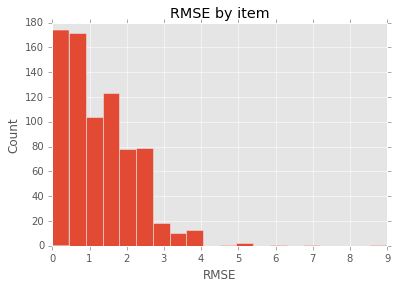

In [79]:
# Plotting RMSE by item
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
rmsevals=rmse_results['rmse_by_item']['rmse']
plt.hist(rmsevals, bins=20)
plt.xlabel('RMSE')
plt.ylabel('Count')
plt.title('RMSE by item')
plt.show()

##### RMSE by item is low, which suggests that book-rating recommendation by item is good.

In [80]:
# Printing RMSE by user 
rmse_results['rmse_by_user']

Columns:
	User-ID	int
	count	int
	rmse	float

Rows: 364

Data:
+---------+-------+----------------+
| User-ID | count |      rmse      |
+---------+-------+----------------+
|  21045  |   1   | 0.909090909091 |
|  163409 |   1   | 0.310344827586 |
|  234288 |   1   |      2.0       |
|  32516  |   4   | 2.16039644441  |
|  75096  |   1   | 1.98333333333  |
|  31820  |   1   | 0.759259259259 |
|  128782 |   3   | 0.805763629825 |
|  94445  |   1   |      1.0       |
|  127244 |   1   | 1.98371335505  |
|  179922 |   1   | 1.62581357645  |
+---------+-------+----------------+
[364 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

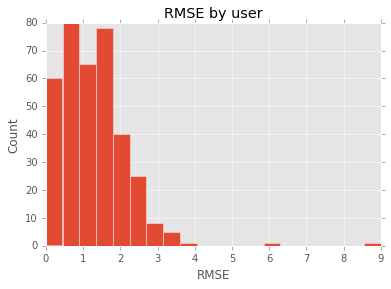

In [81]:
#Plotting RMSE by user
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
rmsevals=rmse_results['rmse_by_user']['rmse']
plt.hist(rmsevals, bins=20)
plt.xlabel('RMSE')
plt.ylabel('Count')
plt.title('RMSE by user')
plt.show()

##### RMSE by user is low, which suggests that book-rating recommendation by user is good.

# 8. Deployment

With the explosive growth in ecommerce where global sales are targeted to top 2.3 Trillion(USD) in 2017 [7], online retailers are deploying a variety of tools to boost traffic and generate sales. As such a key component in boosting online sales is 'getting to know' your consumers and forging a closer relationship with them. Gaining a better understanding of customer needs, preferences and interests are all aspects that are critical in forging this relationship. The go-to technology deployed by retailers to satisfy this need are Recommendation systems.
 
From a deployment perspective, the best recommendation systems do not always need to generate immediate sales. It needs to enhance the user experience in such a way that the consumer feels 'understood' as the suggestions made by the website starts to align with their own individual tastes. It is at that point that the online shopper would begin to forge a relationship and show genuine interest in suggested merchandise vastly increasing cross-selling potential for the retailer.
 
Creating a comprehensive commercially viable recommendation system is the ultimate goal of our project. While accurately predicting what the consumer would buy is a key component of a successful recommendation system, we also need to enhance the shopping experience giving the consumers the opportunity to discover novelty items that would interest them. The system also needs to be mindful of user fatigue to repeated recommendations that appear too often or look too obvious. It’s also important to not to recommend items that are already in the shopping cart or have already been purchased and/or returned.
 
Keeping all these factors in mind, our final recommendation system will use a blend of three models coupled with an exclusion list. The three models would be the popularity recommender, the performance tuned item-item recommender and the performance tuned user-item recommender. The exclusion list will contain purchased/returned items, items in the cart and items that might have an expired lifespan. At deployment, the recommendation system would produce a pool of candidate items specifically selected for the user where the depending on the page a set number can be randomly picked by the application layer and shown on screen.
 
When a first-time user navigates into the site the recommendation item candidate pool, that we randomly pick items from, will consist of candidates from the popularity recommender. As the user begins to click through items in the site candidate pool will get more items from the item-item model and shift to use-item model’s items. This blended method will not only keep the recommendations fresh but will also have an element of understanding the user’s personality and style. Items shown to returning users will be randomly picked out of a pool of items generated by all three models based on the user’s history. Finally, we will diversify the product pool with merchandise that are not books alone.
 
The integration to the final system will be made available as a web service where the user-id is passed into the service and a recommendation candidate pool is returned back to the application layer. Periodic re-tuning of the models will ensure the longevity of the solution. It’s is our belief that this approach would produce a commercially viable recommendation solution that is scalable across different ecommerce web stores.


# 9. References 
1. https://www.forbes.com/sites/chuckcohn/2015/05/15/a-beginners-guide-to-upselling-and-cross-selling/#2f46b14e2912  
2. http://www2.informatik.uni-freiburg.de/~cziegler/BX/  
3. http://www2.informatik.uni-freiburg.de/~dbis/Publications/05/WWW05.html  
4. https://turi.com/products/create/docs/generated/graphlab.recommender.item_similarity_recommender.ItemSimilarityRecommender.html
5. https://timchen1.gitbooks.io/graphlab/content/recommender/introduction.html  
6. https://turi.com/products/create/docs/generated/graphlab.recommender.ranking_factorization_recommender.RankingFactorizationRecommender.html
7. https://www.emarketer.com/Article/Worldwide-Retail-Ecommerce-Sales-Will-Reach-1915-Trillion-This-Year/1014369
8. https://timchen1.gitbooks.io/graphlab/content/recommender/choosing-a-model.html
9. https://blog.nycdatascience.com/student-works/book-rating-prediction-recommendation-engine/
10. https://en.wikipedia.org/wiki/Sparse_matrix
11. http://minimaxir.com/2014/06/reviewing-reviews/

